<a href="https://colab.research.google.com/github/Networkcaretaker/PythonHacks/blob/main/projects/kaggle/house-prices-advanced-regression-techniques/Part_1_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
## [House Prices - Advanced Regression Techniques](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques)
Predict sales prices and practice feature engineering, RFs, and gradient boosting.

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence. With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.




# Part 1: Exploratory Data Analysis

# Setup
Prepare setup requirements, import modules and get data

## Requirements

In [ ]:
# install required libraries
# !pip install -q -r "requirements.txt"

In [ ]:
# Connect Drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# remove sample_data folder
!rm -rf "sample_data"

## Import Modules

In [ ]:
import os
import zipfile
from pathlib import Path
from copy import deepcopy

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Get Data

In [ ]:
# Unzip dataset to data folder
data_dir = Path("data/")
local_zip = "drive/MyDrive/Machine Learning Data/house-prices-advanced-regression-techniques.zip"
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall(data_dir)
zip_ref.close()

# Functions

## Plots

In [ ]:
# Function to plot numeric scatter charts for numeric values against SalePrice
def scatter_plots(data, cols, target='SalePrice'):
    num_plots = len(cols)
    num_cols = 4
    num_rows = (num_plots + num_cols - 1) // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))
    for i, col in enumerate(cols):
        row = i // num_cols
        col_idx = i % num_cols
        ax = axes[row, col_idx] if num_rows > 1 else axes[col_idx]

        ax.scatter(train_df[col], train_df[target])
        ax.set_xlabel(col)
        ax.set_ylabel(target)

    plt.tight_layout()
    plt.show()

In [ ]:
# Function to plot object INDEX values against value count by grounping ID
def group_bar_charts(data, cols, target='Id'):
    num_plots = len(cols)
    num_cols = 4
    num_rows = (num_plots + num_cols - 1) // num_cols
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))
    for i, col in enumerate(cols):
        row = i // num_cols
        col_idx = i % num_cols
        ax = axes[row, col_idx] if num_rows > 1 else axes[col_idx]

        data.groupby(col)[target].count().plot(kind='bar', ax=ax)
        ax.set_xlabel(col)
        ax.set_ylabel(target)

    plt.tight_layout()
    plt.show()

In [ ]:
# Function to plot hist
def hist_plots(data, cols):
    data[cols].fillna('unknown')
    num_plots = len(cols)
    num_cols = 4
    num_rows = (num_plots + num_cols - 1) // num_cols
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))
    for i, col in enumerate(cols):
        row = i // num_cols
        col_idx = i % num_cols
        ax = axes[row, col_idx] if num_rows > 1 else axes[col_idx]

        ax.hist(data[col])
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

In [ ]:
# Function to plot multiple boxplot
def box_plots(data, cols):
    num_plots = len(cols)
    num_cols = 2
    num_rows = (num_plots + num_cols - 1) // num_cols
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))
    for i, col in enumerate(cols):
        row = i // num_cols
        col_idx = i % num_cols
        ax = axes[row, col_idx] if num_rows > 1 else axes[col_idx]

        sns.boxplot(x=data[col], ax=ax)
        ax.set_xlabel
        ax.set_ylabel

    plt.tight_layout()
    plt.show()

In [ ]:
# check for outliers with np.quantile
def check_outliers(data, col, lower=0.25, upper=0.75):
    Q1 = np.quantile(data[col], lower)
    Q3 = np.quantile(data[col], upper)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f"lower_bound: {lower_bound}")
    print(f"upper_bound: {upper_bound}")
    print(f"Number of outliers: {outliers.shape[0]}")

    sns.boxplot(x=data[col])

    return outliers

# Explore Dataframes

In [ ]:
# Create dataframes from raw data
train_df = pd.read_csv(data_dir / "train.csv")
test_df = pd.read_csv(data_dir / "test.csv")

print(f"train_df shape: {train_df.shape}")
print(f"test_df shape: {test_df.shape}")

train_df shape: (1460, 81)
test_df shape: (1459, 80)


In [ ]:
# create a dictionary for column groups
column_dict = {}

## Compare columns in train and test datasets

In [ ]:
# Compare columns in train and test datasets
train_cols = set(train_df.columns)
test_cols = set(test_df.columns)

# Identify columns present in train but not in test
cols_in_train_not_test = train_cols - test_cols
print(f"Columns in train but not in test:\n{cols_in_train_not_test}")

# Identify columns present in test but not in train
cols_in_test_not_train = test_cols - train_cols
print(f"Columns in test but not in train:\n{cols_in_test_not_train}")

# Check if the remaining columns are identical
if train_cols - {'SalePrice'} == test_cols:
    print("Train and test datasets have the same columns (excluding SalePrice).")
else:
    print("Train and test datasets do not have the same columns.")

Columns in train but not in test:
{'SalePrice'}
Columns in test but not in train:
set()
Train and test datasets have the same columns (excluding SalePrice).


## Explore Train data

In [ ]:
train_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
train_df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

## Explore Features

In [ ]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
FEATURE = 'SalePrice'

train_df[FEATURE].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

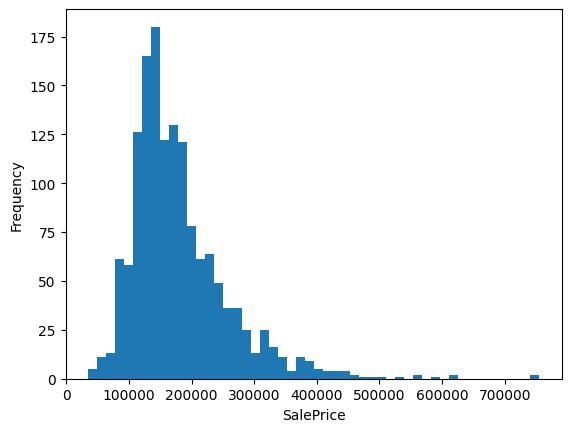

In [ ]:
plt.hist(train_df[FEATURE], bins=50)
plt.xlabel(FEATURE)
plt.ylabel('Frequency')
plt.show()

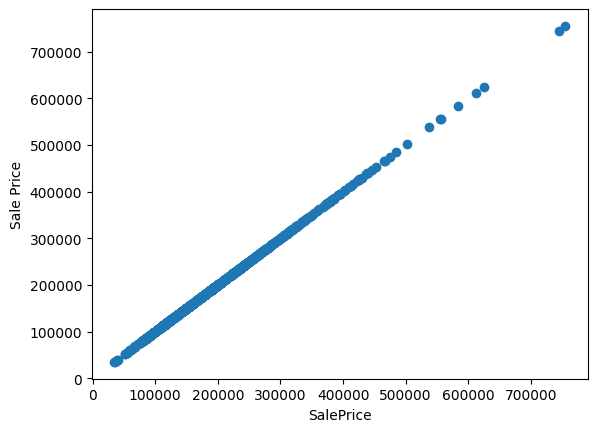

In [ ]:
plt.scatter(train_df[FEATURE], train_df['SalePrice'])
plt.xlabel(FEATURE)
plt.ylabel('Sale Price')
plt.show()

## Explore Outliers

lower_bound: 3937.5
upper_bound: 340037.5
Number of outliers: 61


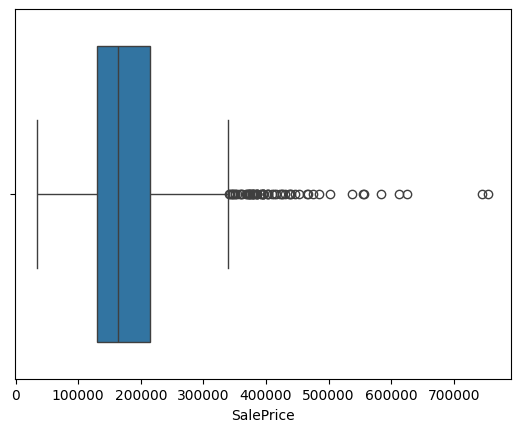

In [ ]:
outliers_df = check_outliers(train_df, FEATURE)
#plot = sns.boxplot(x=train_df[FEATURE])

In [ ]:
outliers_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
11    12          60       RL         85.0    11924   Pave   NaN      IR1   
53    54          20       RL         68.0    50271   Pave   NaN      IR1   
58    59          60       RL         66.0    13682   Pave   NaN      IR2   
112  113          60       RL         77.0     9965   Pave   NaN      Reg   
151  152          20       RL        107.0    13891   Pave   NaN      Reg   

    LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
11          Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
53          Low    AllPub  ...        0    NaN   NaN         NaN       0   
58          HLS    AllPub  ...        0    NaN   NaN         NaN       0   
112         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
151         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
11       7   2006       New        Partial     345000  
53      11   2006        WD         Normal     385000  
58      10   2006       New        Partial     438780  
112     10   2007       New        Partial     383970  
151      1   2008       New        Partial     372402  

[5 rows x 81 columns]

## Columns with missing data

In [ ]:
null_values = train_df.isna().sum().sort_values(ascending=False)
null_values

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [ ]:
# null values as percentage
null_values_percent = null_values / len(train_df)
null_values_percent

PoolQC         0.995205
MiscFeature    0.963014
Alley          0.937671
Fence          0.807534
MasVnrType     0.597260
                 ...   
ExterQual      0.000000
Exterior2nd    0.000000
Exterior1st    0.000000
RoofMatl       0.000000
SalePrice      0.000000
Length: 81, dtype: float64

In [ ]:
# Get columns with more than 80% missing data
null_values = pd.DataFrame(null_values[null_values_percent > 0.8])
null_columns = null_values.T.columns
null_columns

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], dtype='object')

In [ ]:
column_dict['null_columns'] = null_columns.to_list()
column_dict

{'null_columns': ['PoolQC', 'MiscFeature', 'Alley', 'Fence']}

## Numeric columns

In [ ]:
# Find numeric columns
numeric_cols = train_df.select_dtypes(include=[np.number]).columns
train_df[numeric_cols].head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 38 columns]

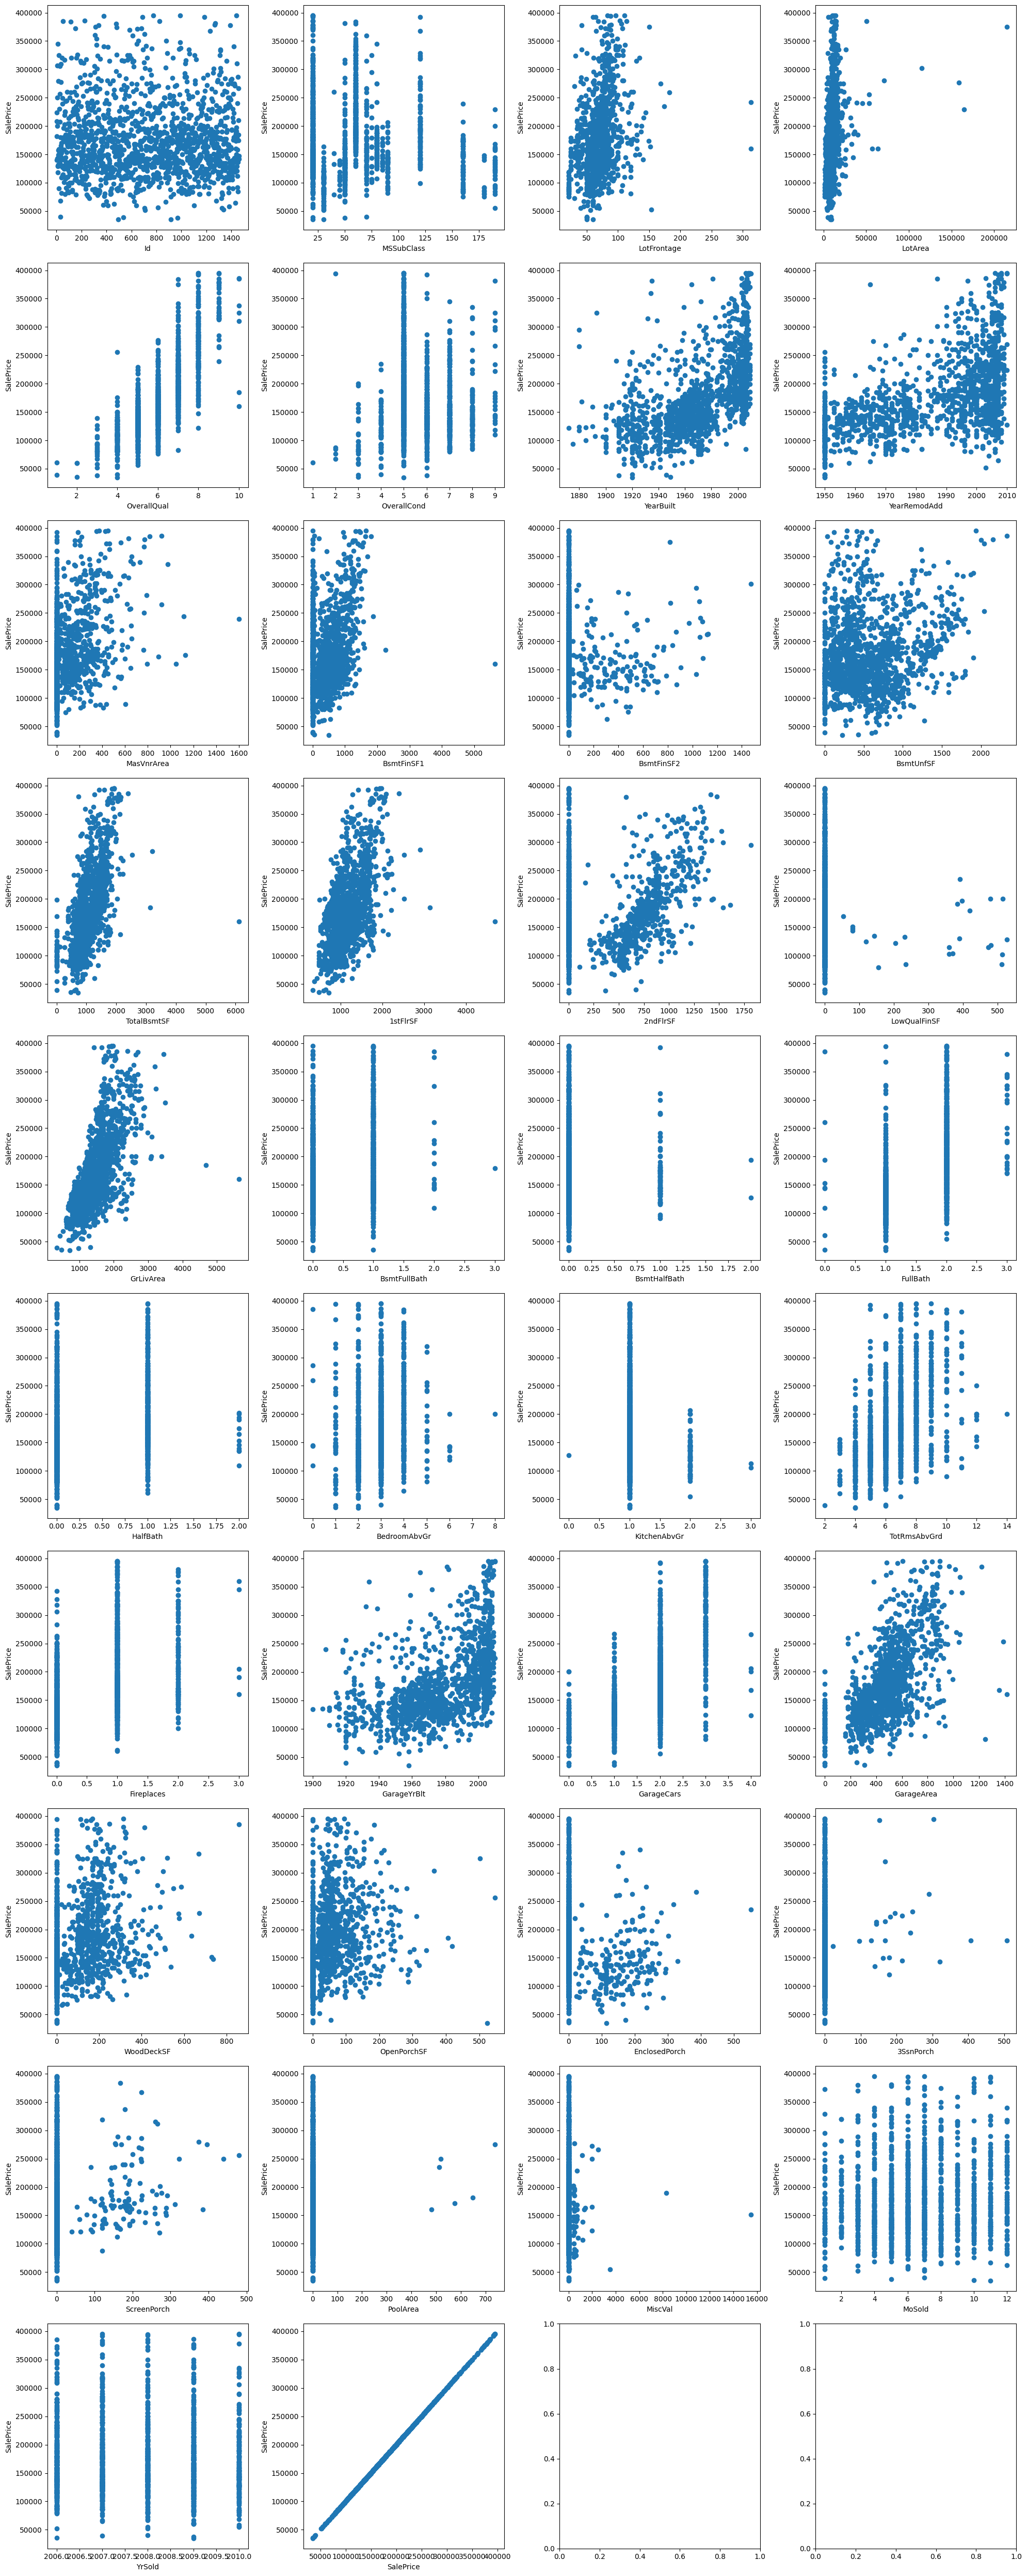

In [ ]:
# Visulise data against SalePrice
scatter_plots(train_df, numeric_cols)

### Numeric column corrolation

In [ ]:
# numeric_cols correlation with SalePrice
train_df[numeric_cols].corrwith(train_df['SalePrice']).sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.794784
GrLivArea        0.663579
GarageCars       0.646759
GarageArea       0.624492
TotalBsmtSF      0.575020
1stFlrSF         0.564498
YearBuilt        0.558338
FullBath         0.556311
YearRemodAdd     0.538547
GarageYrBlt      0.507004
TotRmsAbvGrd     0.480354
Fireplaces       0.465572
MasVnrArea       0.402717
BsmtFinSF1       0.336440
LotFrontage      0.334837
WoodDeckSF       0.323554
OpenPorchSF      0.314984
2ndFlrSF         0.282859
HalfBath         0.266280
LotArea          0.247922
BsmtFullBath     0.226368
BsmtUnfSF        0.212270
BedroomAbvGr     0.166166
ScreenPorch      0.092583
MoSold           0.087163
3SsnPorch        0.065039
PoolArea         0.038721
BsmtFinSF2      -0.003104
MiscVal         -0.017660
Id              -0.021980
BsmtHalfBath    -0.023808
YrSold          -0.029471
LowQualFinSF    -0.059944
OverallCond     -0.068317
MSSubClass      -0.080703
KitchenAbvGr    -0.145844
EnclosedPorch   -0.147093
dtype: float64

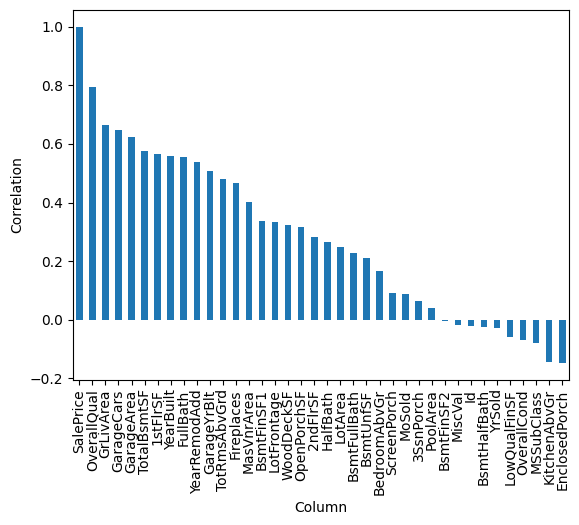

In [ ]:
# plot bar chart for numeric_cols correlation with SalePrice
train_df[numeric_cols].corrwith(train_df['SalePrice']).sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Column')
plt.ylabel('Correlation')
plt.show()

In [ ]:
# get list of top 10 colunms for numeric_cols correlation with SalePrice
corr_features = train_df[numeric_cols].corrwith(train_df['SalePrice']).sort_values(ascending=False)[:11].index.to_list()
corr_features.remove('SalePrice')
corr_features

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd']

In [ ]:
column_dict['corr_features'] = corr_features
column_dict

{'null_columns': ['PoolQC',
  'MiscFeature',
  'Alley',
  'Fence',
  'MasVnrType',
  'FireplaceQu'],
 'corr_features': ['OverallQual',
  'GrLivArea',
  'GarageCars',
  'GarageArea',
  'TotalBsmtSF',
  '1stFlrSF',
  'FullBath',
  'TotRmsAbvGrd',
  'YearBuilt',
  'YearRemodAdd']}

### Explore numeric features

In [ ]:
train_df.select_dtypes(include=[np.number]).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [ ]:
FEATURE = 'OverallQual'

train_df[FEATURE].describe()

count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64

In [ ]:
print(f"Unique values:\n{train_df[FEATURE].unique()}")

Unique values:
[ 7  6  8  5  9  4 10  3  1  2]


In [ ]:
print(f"NaN count: {train_df[FEATURE].isna().sum()}")
print(f"Zero values: {(train_df[FEATURE] == 0).sum()}")
print(f"Corrolation with SalePrice: {train_df[FEATURE].corr(train_df['SalePrice'])}")

NaN count: 0
Zero values: 0
Corrolation with SalePrice: 0.7909816005838044


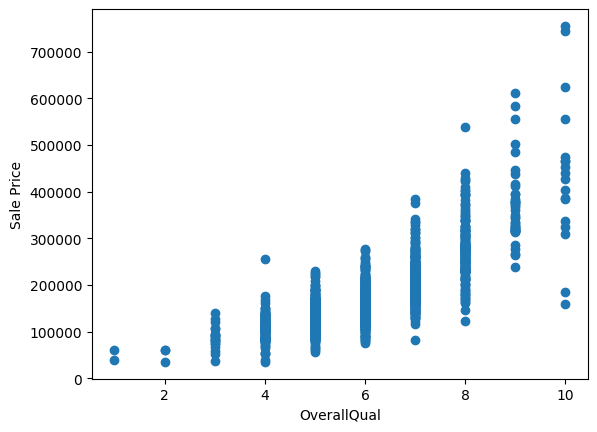

In [ ]:
# plot FEATURE value against SalePrice
plt.scatter(train_df[FEATURE], train_df['SalePrice'])
plt.xlabel(FEATURE)
plt.ylabel('Sale Price')
plt.show()

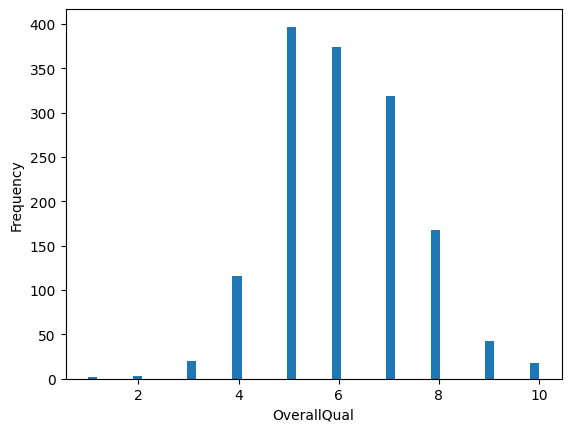

In [ ]:
# plot feature frequency
plt.hist(train_df[FEATURE], bins=50)
plt.xlabel(FEATURE)
plt.ylabel('Frequency')
plt.show()

lower_bound: 2.0
upper_bound: 10.0
Number of outliers: 2


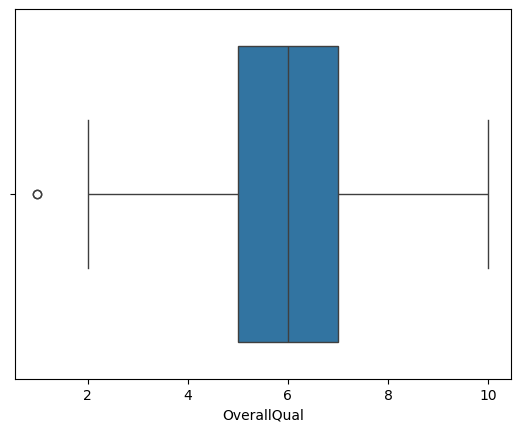

In [ ]:
feature_outliers = check_outliers(train_df, FEATURE)

In [ ]:
feature_outliers.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
375  376          30       RL          NaN    10020   Pave   NaN      IR1   
533  534          20       RL         50.0     5000   Pave   NaN      Reg   

    LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
375         Low    AllPub  ...        0    NaN   NaN         NaN       0   
533         Low    AllPub  ...        0    NaN   NaN         NaN       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
375      3   2009        WD         Normal      61000  
533      1   2007        WD         Normal      39300  

[2 rows x 81 columns]

In [ ]:
# Columns to drop with irrelivent values
numeric_drop_list = ['Id', 'MiscVal']
column_dict['numeric_drop_list'] = numeric_drop_list
numeric_drop_list

['PoolArea', 'MiscVal']

## Object columns

In [ ]:
# Find object columns
object_cols = train_df.select_dtypes(include=[object]).columns
train_df[object_cols].head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1  ... GarageType GarageFinish GarageQual GarageCond  \
0      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
1      Veenker      Feedr  ...     Attchd          RFn         TA         TA   
2      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
3      Crawfor       Norm  ...     Detchd          Unf         TA         TA   
4      NoRidge       Norm  ...     Attchd          RFn         TA         TA   

  PavedDrive PoolQC Fence MiscFeature SaleType SaleCondition  
0          Y    NaN   NaN         NaN       WD        Normal  
1          Y    NaN   NaN         NaN       WD        Normal  
2          Y    NaN   NaN         NaN       WD        Normal  
3          Y    NaN   NaN         NaN       WD       Abnorml  
4          Y    NaN   NaN         NaN       WD        Normal  

[5 rows x 43 columns]

In [ ]:
# replace null with 'unknown'
train_df[object_cols] = train_df[object_cols].fillna('unknown')
test_df[object_cols] = test_df[object_cols].fillna('unknown')

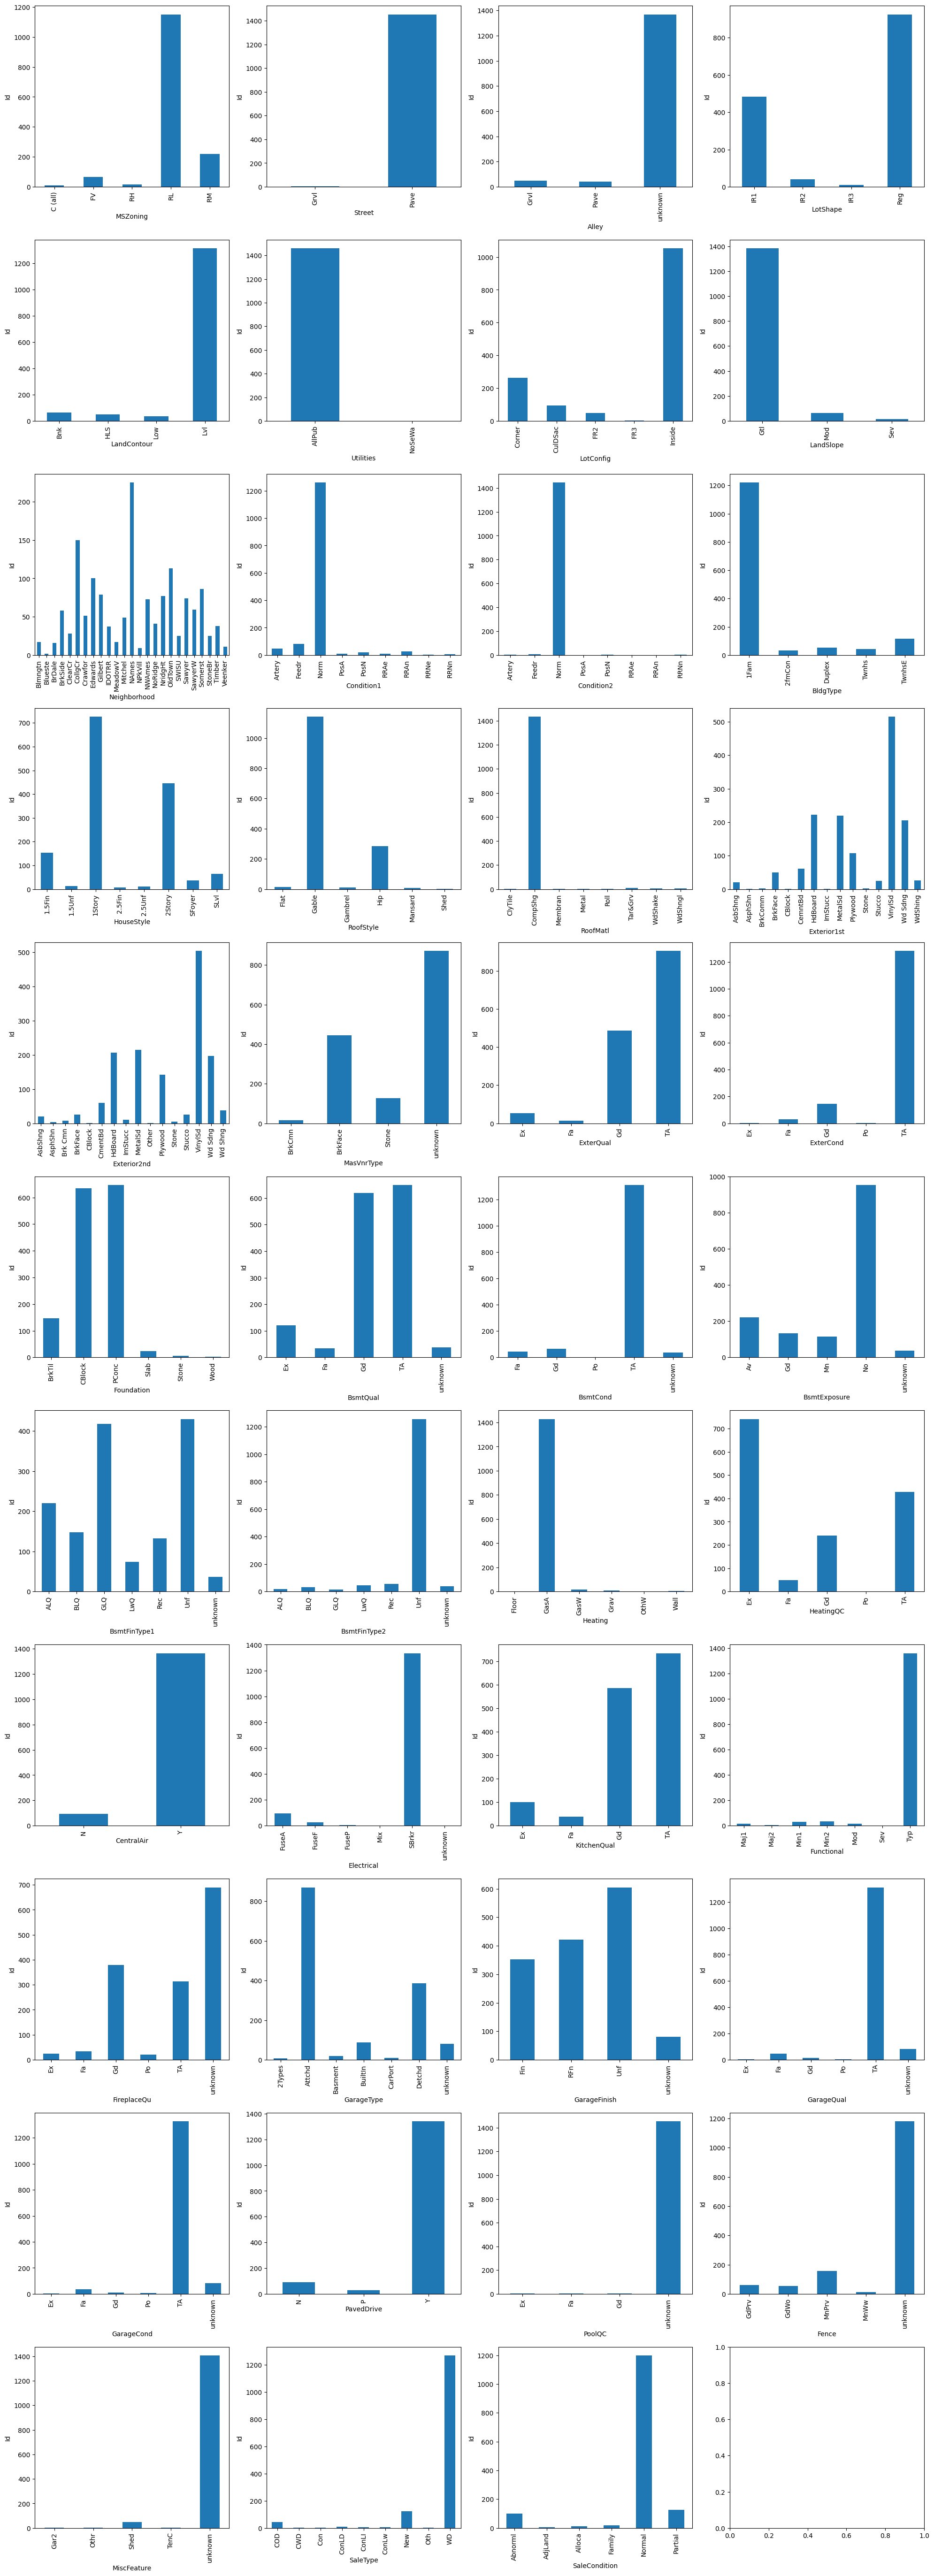

In [ ]:
# Visulise data against Value Count
group_bar_charts(train_df, object_cols)

### Object column frequancy

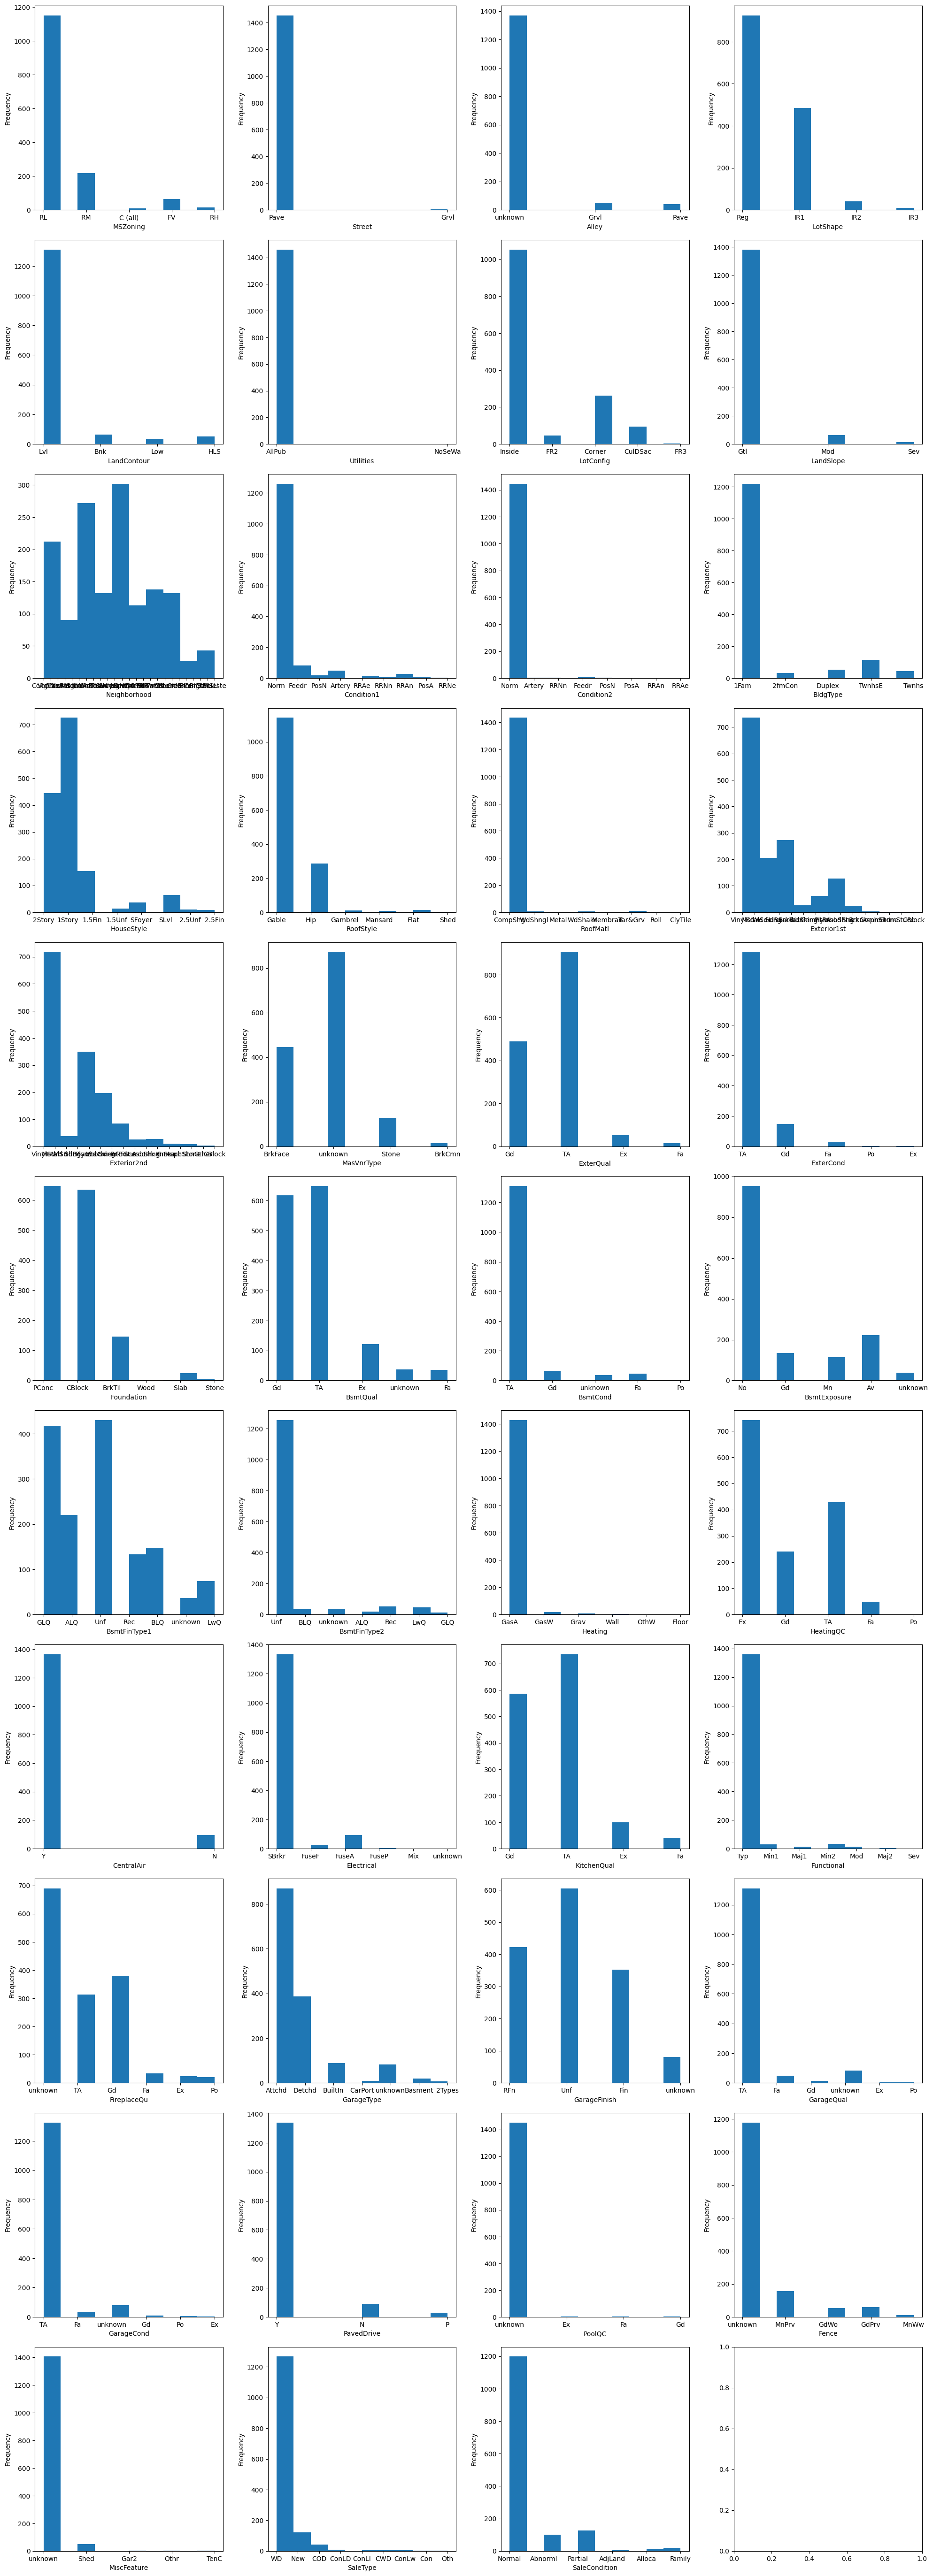

In [ ]:
# Check frequancy of object features
hist_plots(train_df, object_cols)

### Expore single features

In [ ]:
train_df.select_dtypes(include=[object]).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
# Select Value to Analyse
INDEX = 'Street'
train_df[INDEX].value_counts()

Street
Pave    1454
Grvl       6
Name: count, dtype: int64

In [ ]:
train_df[INDEX].isna().sum()

0

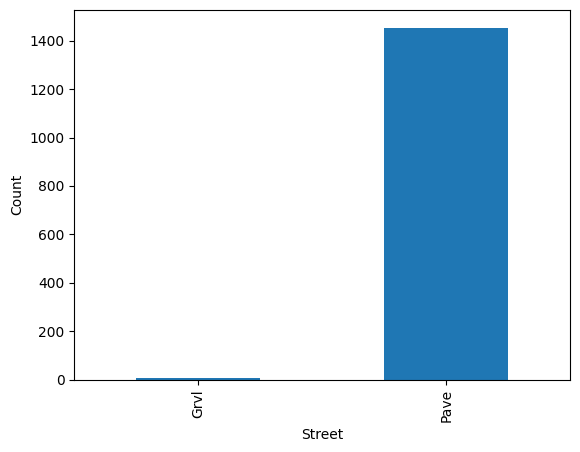

In [ ]:
# plot INDEX value against value count
train_df.groupby(INDEX)['Id'].count().plot(kind='bar')
plt.xlabel(INDEX)
plt.ylabel('Count')
plt.show()

In [ ]:
# Columns to drop with irrelivent values
object_drop_list = ['Street', 'Utilities', 'Functional', 'PavedDrive', 'Condition2']
column_dict['object_drop_list'] = object_drop_list
object_drop_list

['Street', 'Utilities', 'Functional', 'PavedDrive', 'Condition2']

# Column Grouping

## Property Condition

In [ ]:
# Values to transform into Ranked values
property_condition = ['ExterQual', 'ExterCond', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual']
column_dict['property_condition'] = property_condition
train_df[property_condition].head()

ExterQual ExterCond GarageQual GarageCond BsmtQual BsmtCond HeatingQC  \
0        Gd        TA         TA         TA       Gd       TA        Ex   
1        TA        TA         TA         TA       Gd       TA        Ex   
2        Gd        TA         TA         TA       Gd       TA        Ex   
3        TA        TA         TA         TA       TA       Gd        Gd   
4        Gd        TA         TA         TA       Gd       TA        Ex   

  KitchenQual  
0          Gd  
1          TA  
2          Gd  
3          Gd  
4          Gd

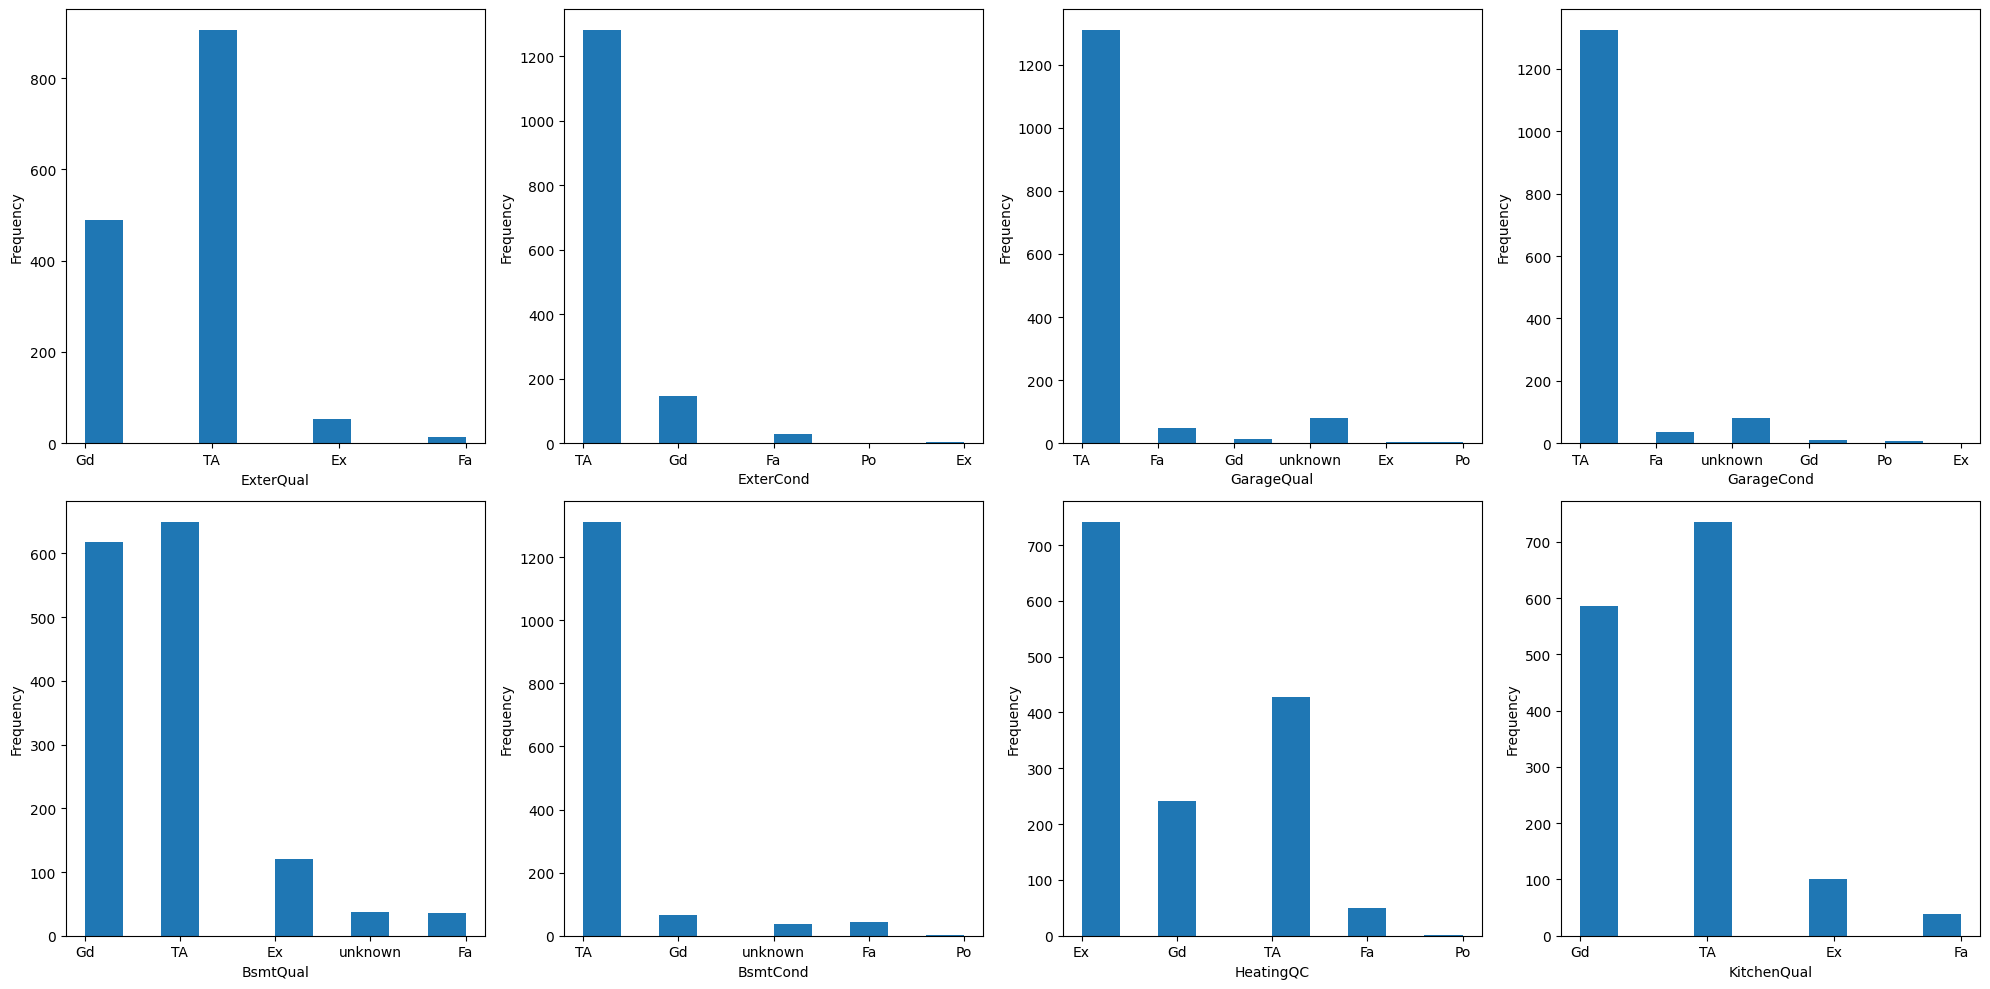

In [ ]:
hist_plots(train_df, property_condition)

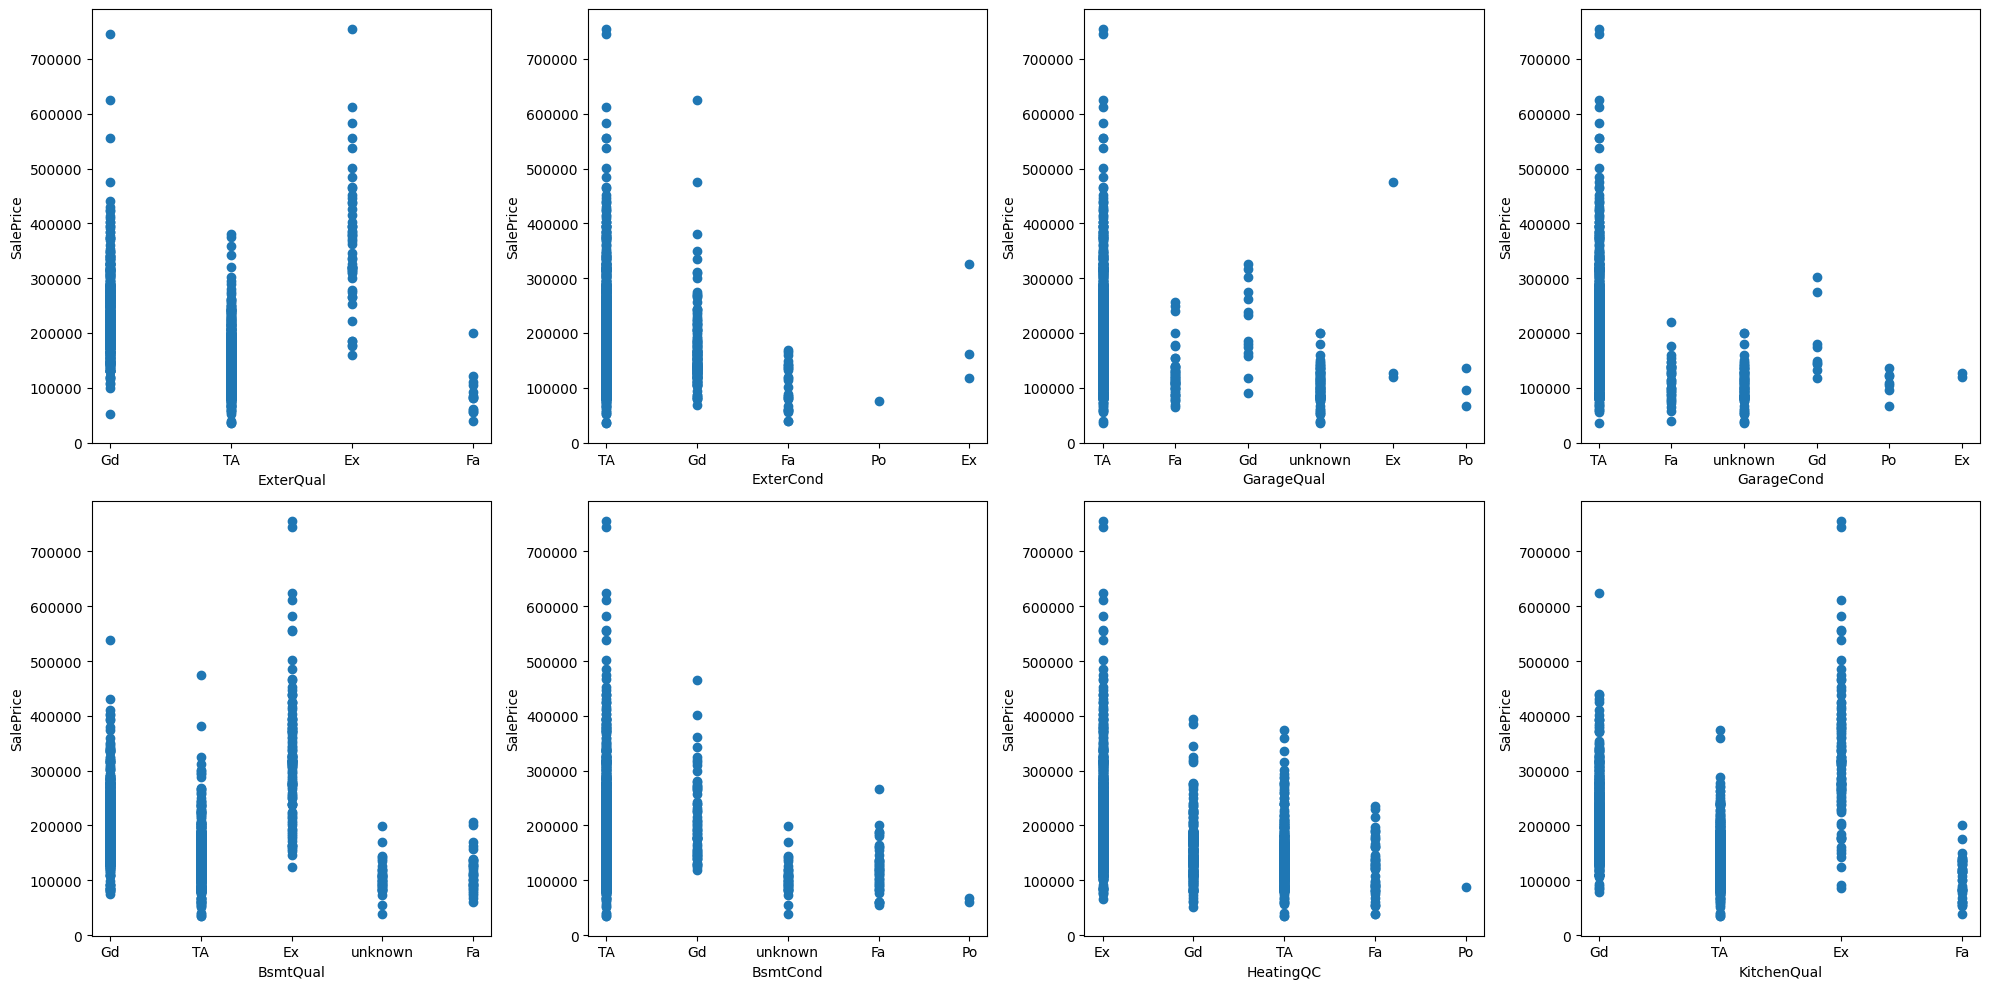

In [ ]:
scatter_plots(train_df, property_condition)

Unknown values appear to represent whether or not a property has a feature, specifically a garage and a basement. I will set the ranked value of Unknown values (NaN) as 0 during transformations but will create 2 new features frim this data.

```rank_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po':1, 'Unknown':0}```

New features:
- ```hasGarage: bool```
- ```hasBasement: bool```

## Property Size

In [ ]:
# Area values for properties
property_size = ['LotFrontage', 'LotArea', 'MasVnrArea', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']
column_dict['property_size'] = property_size
train_df[property_size].head()

LotFrontage  LotArea  MasVnrArea  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0         65.0     8450       196.0       856       854             0   
1         80.0     9600         0.0      1262         0             0   
2         68.0    11250       162.0       920       866             0   
3         60.0     9550         0.0       961       756             0   
4         84.0    14260       350.0      1145      1053             0   

   GrLivArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  GarageArea  \
0       1710         706           0        150          856         548   
1       1262         978           0        284         1262         460   
2       1786         486           0        434          920         608   
3       1717         216           0        540          756         642   
4       2198         655           0        490         1145         836   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  
0           0           61              0          0            0  
1         298            0              0          0            0  
2           0           42              0          0            0  
3           0           35            272          0            0  
4         192           84              0          0            0

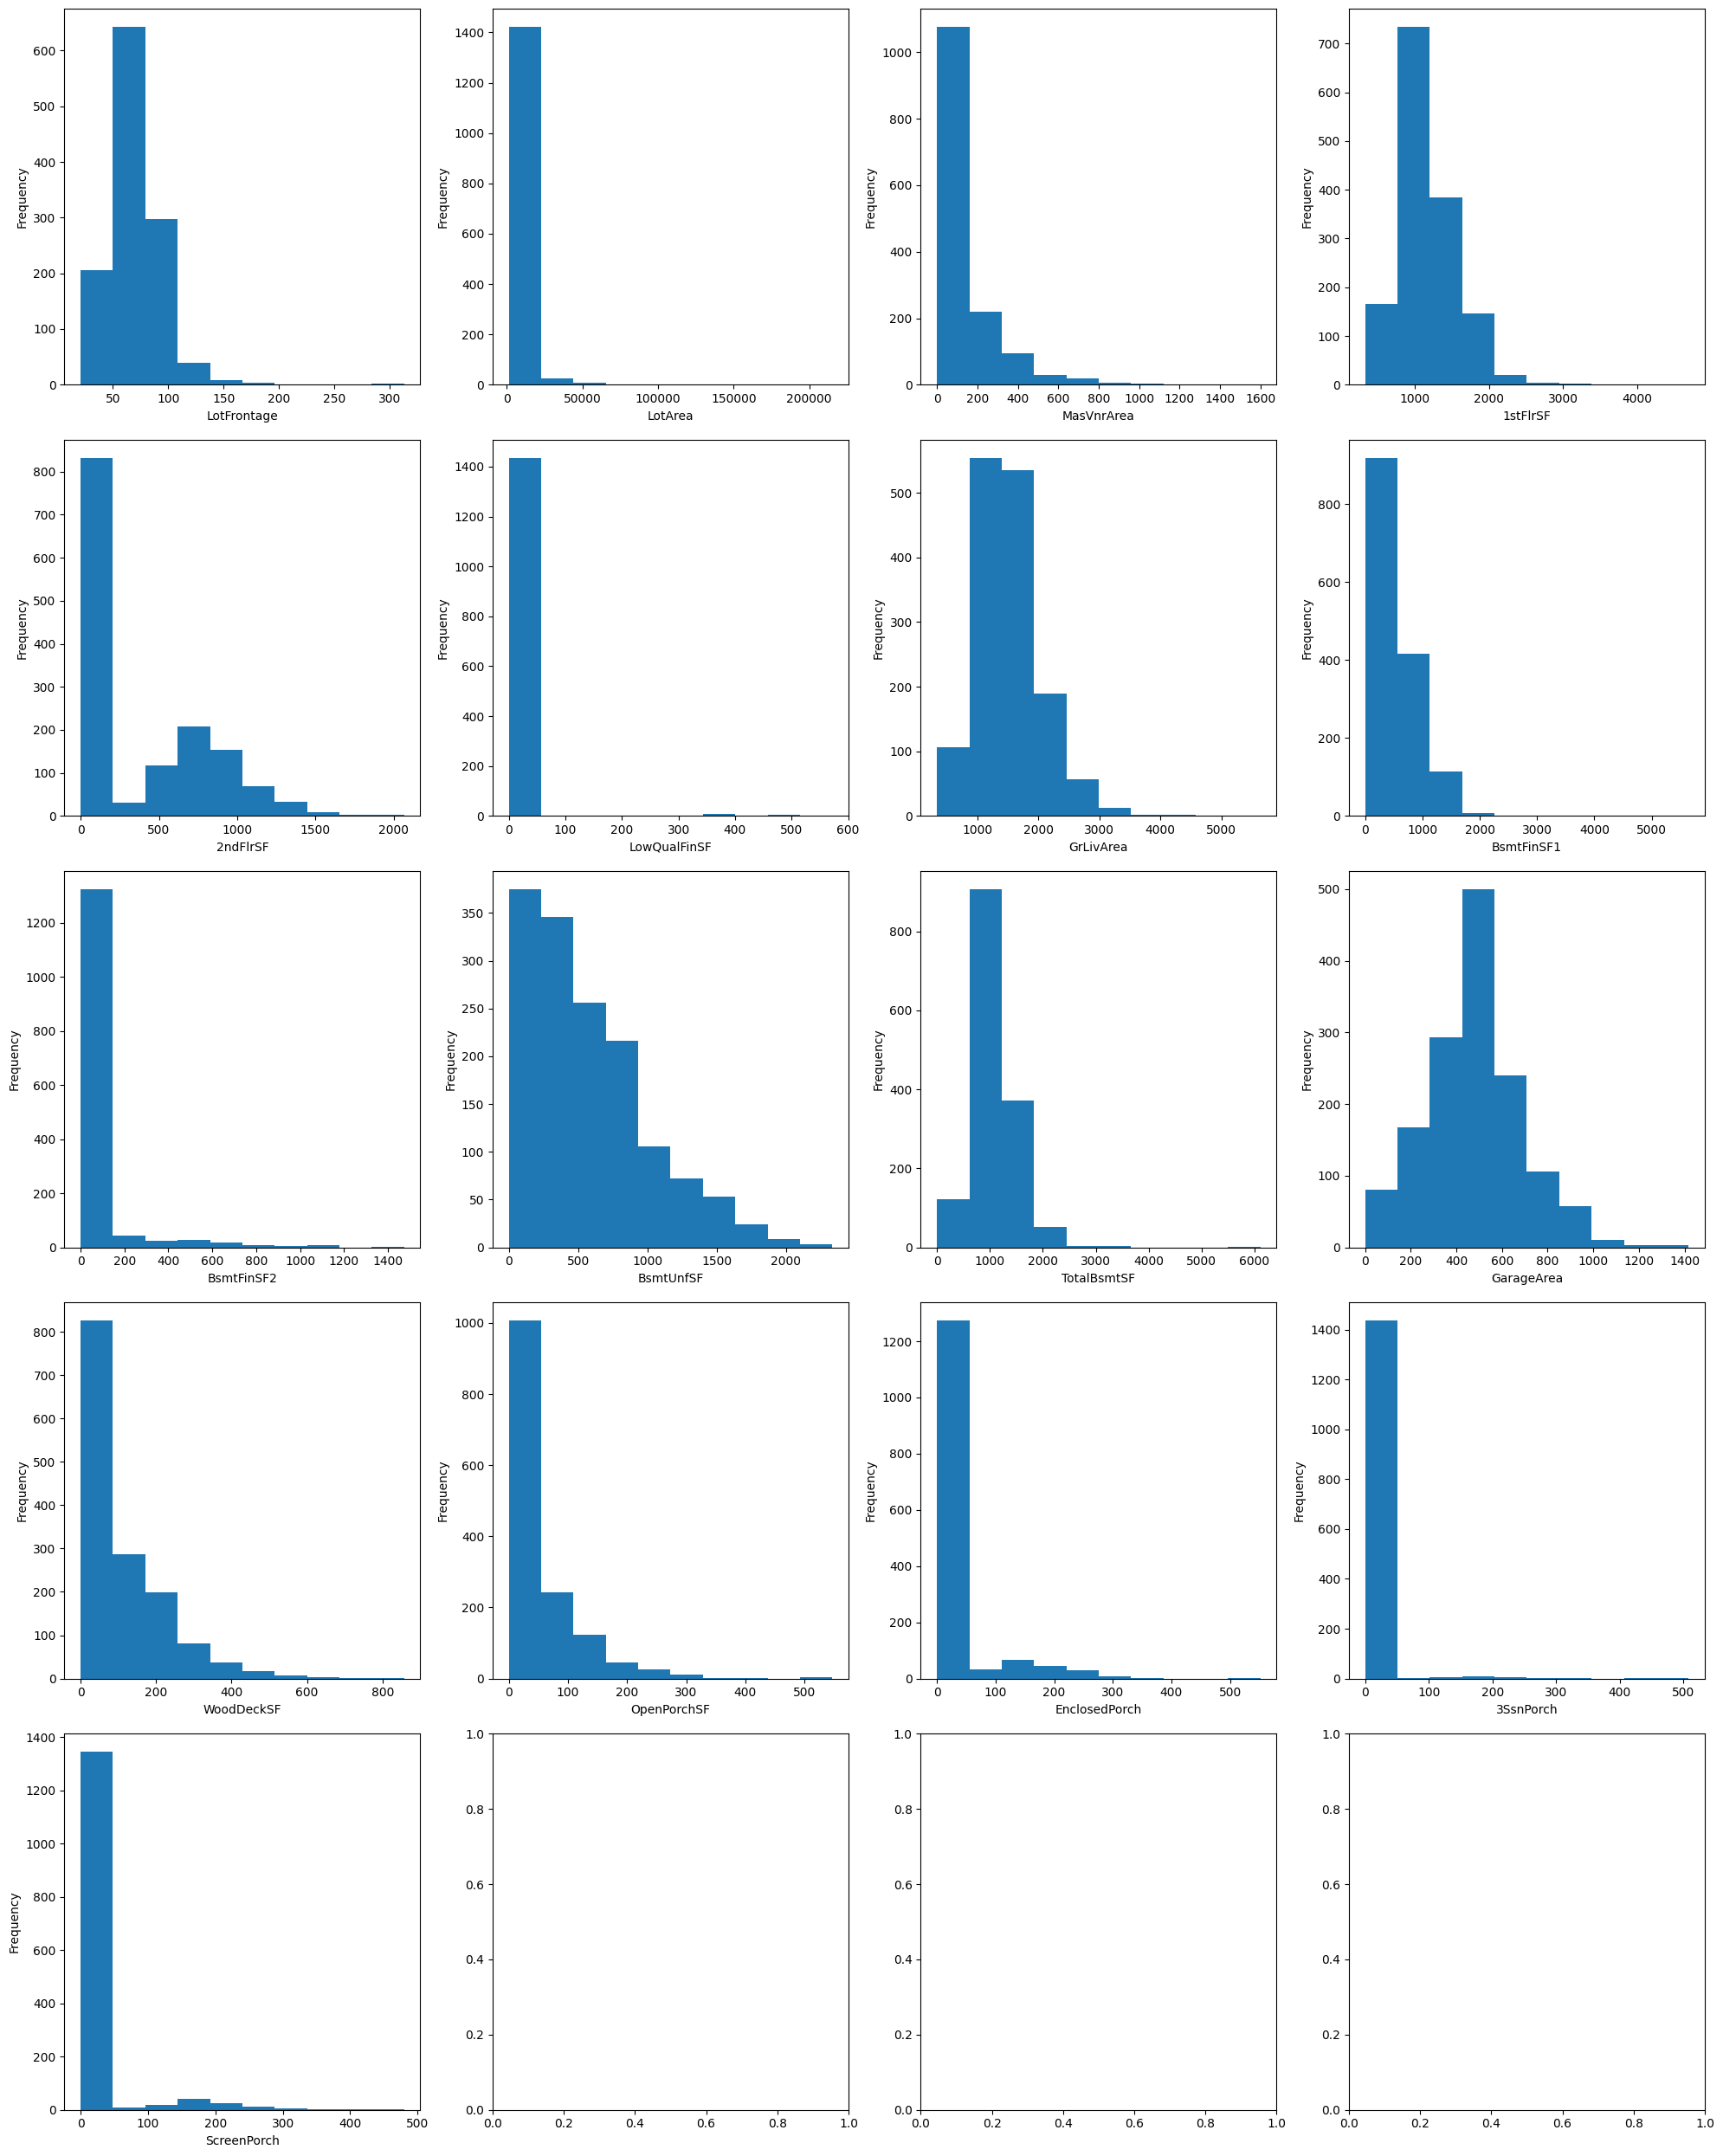

In [ ]:
hist_plots(train_df, property_size)

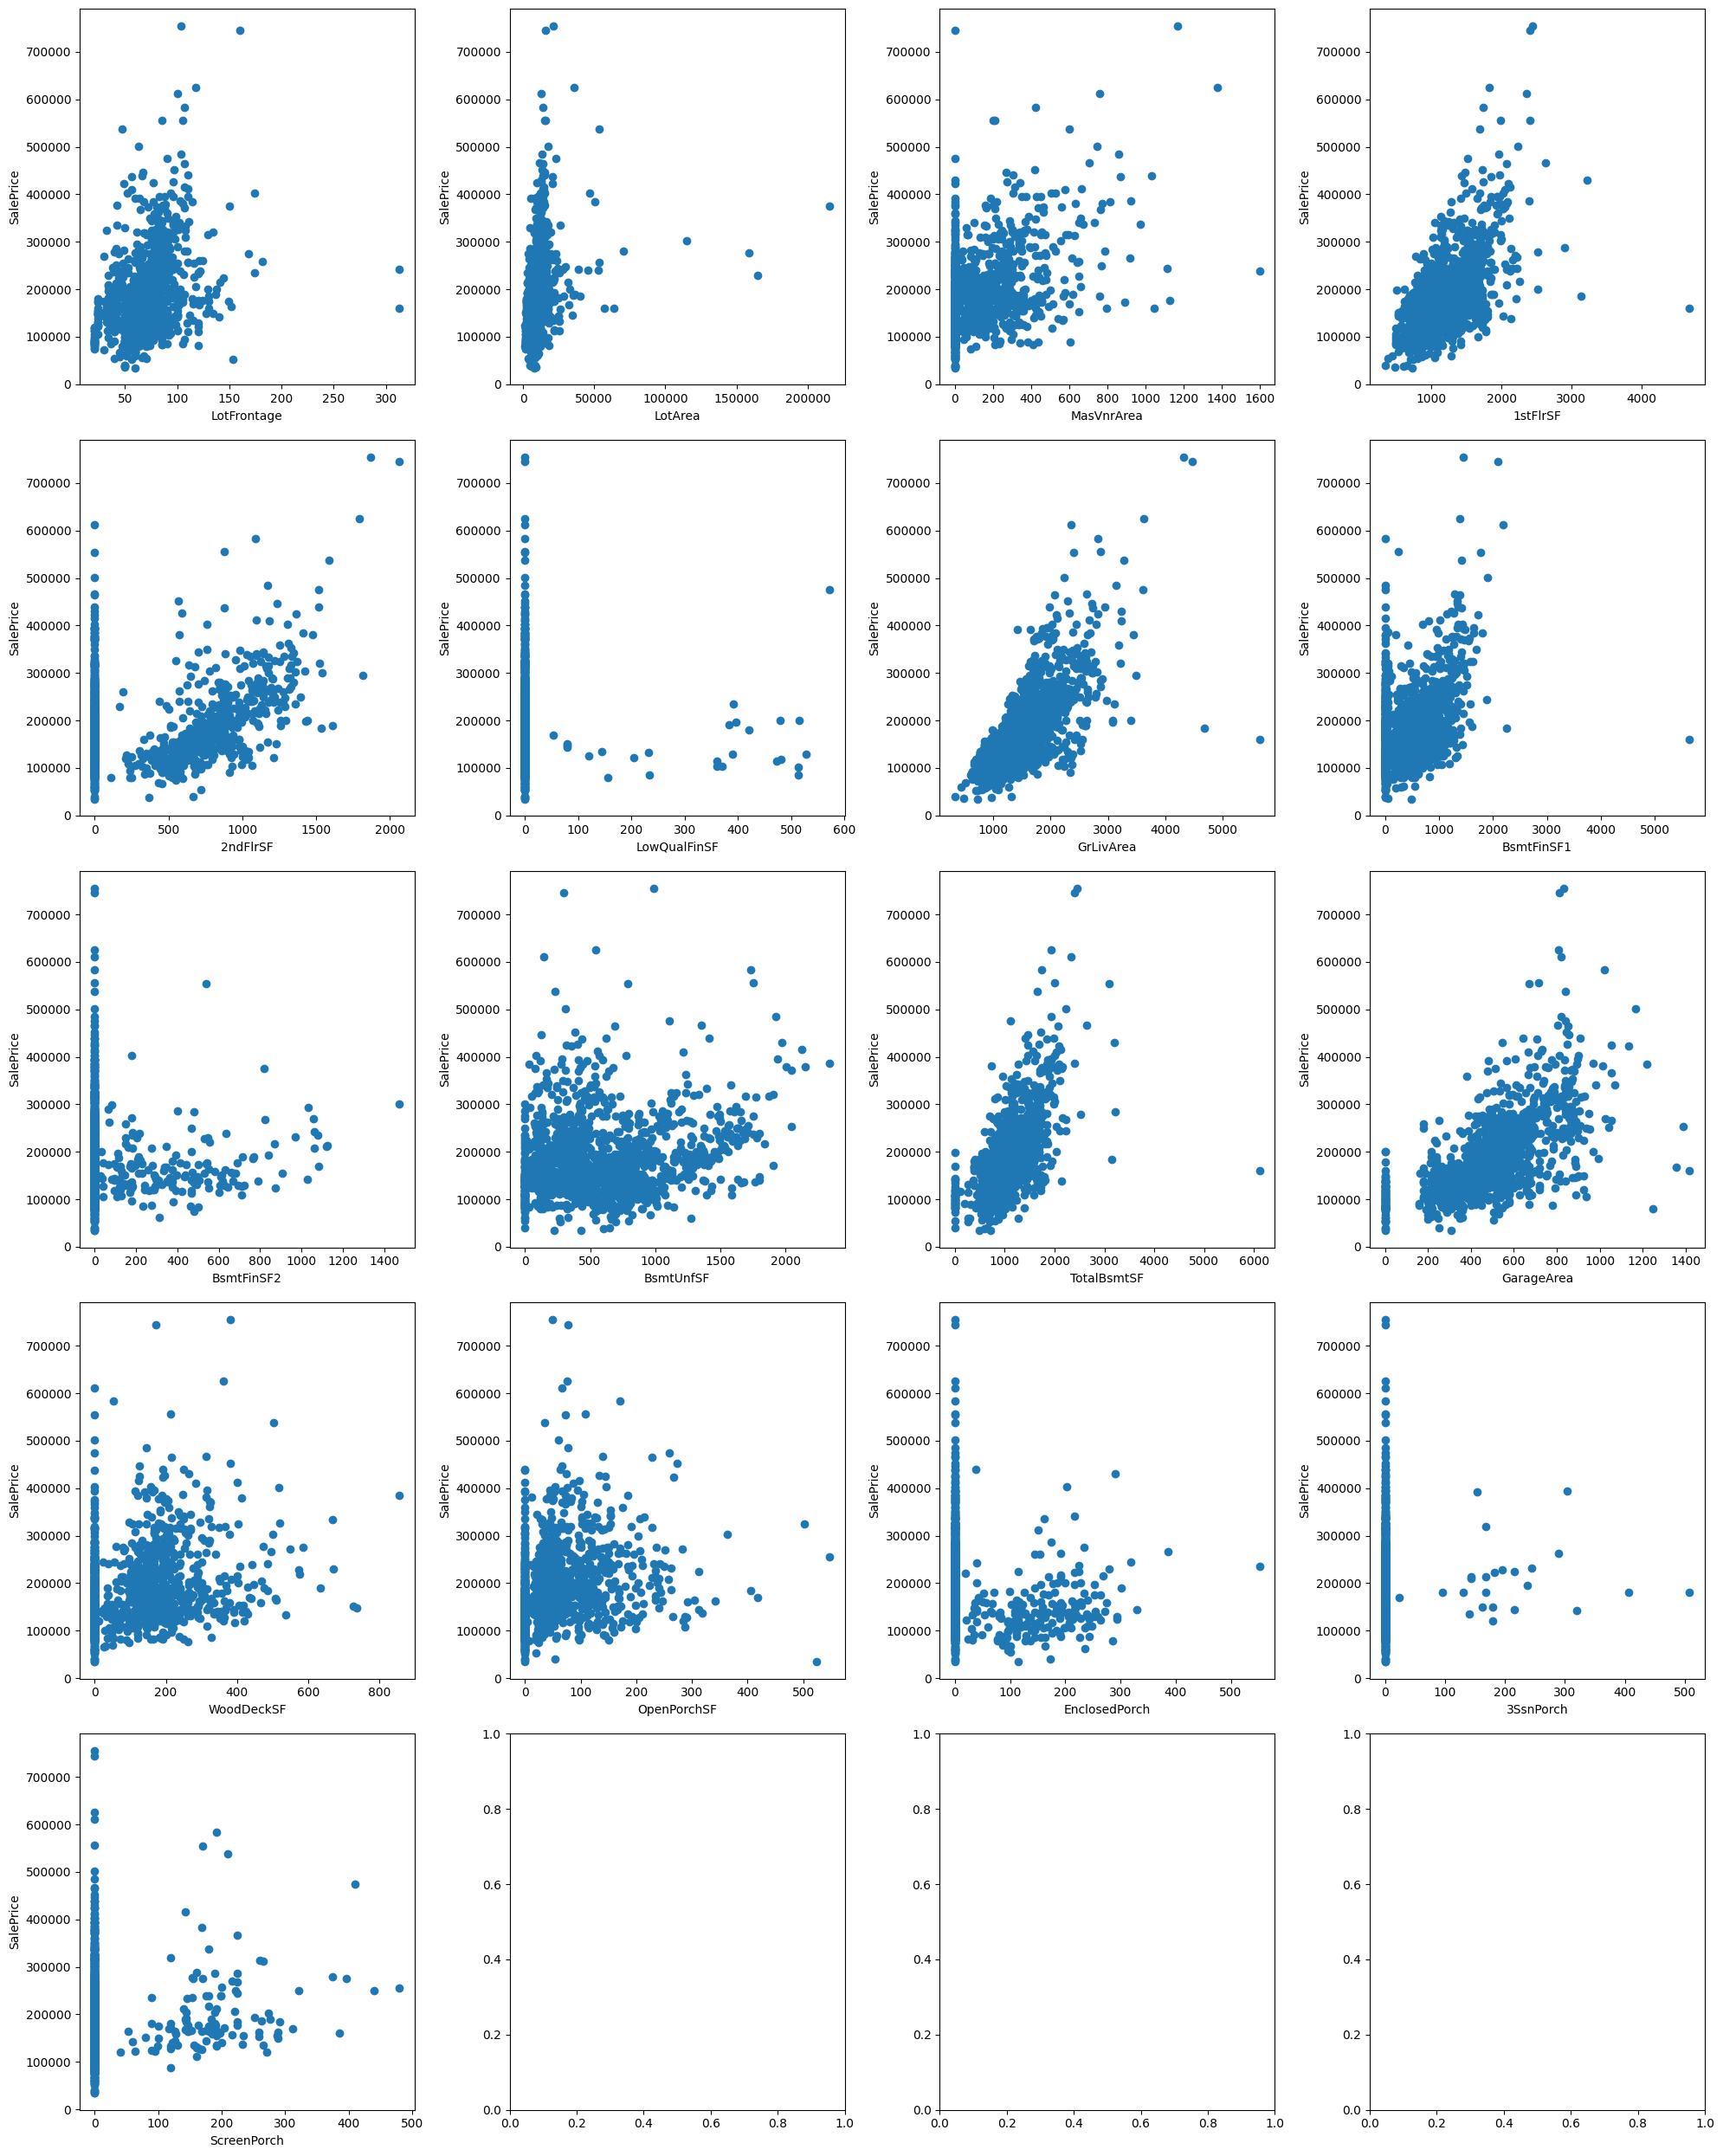

In [ ]:
scatter_plots(train_df, property_size)

## Property Rooms

In [ ]:
# Number of rooms in property
property_rooms = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd']
column_dict['property_rooms'] = property_rooms
train_df[property_rooms].head()

BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

   TotRmsAbvGrd  
0             8  
1             6  
2             6  
3             7  
4             9

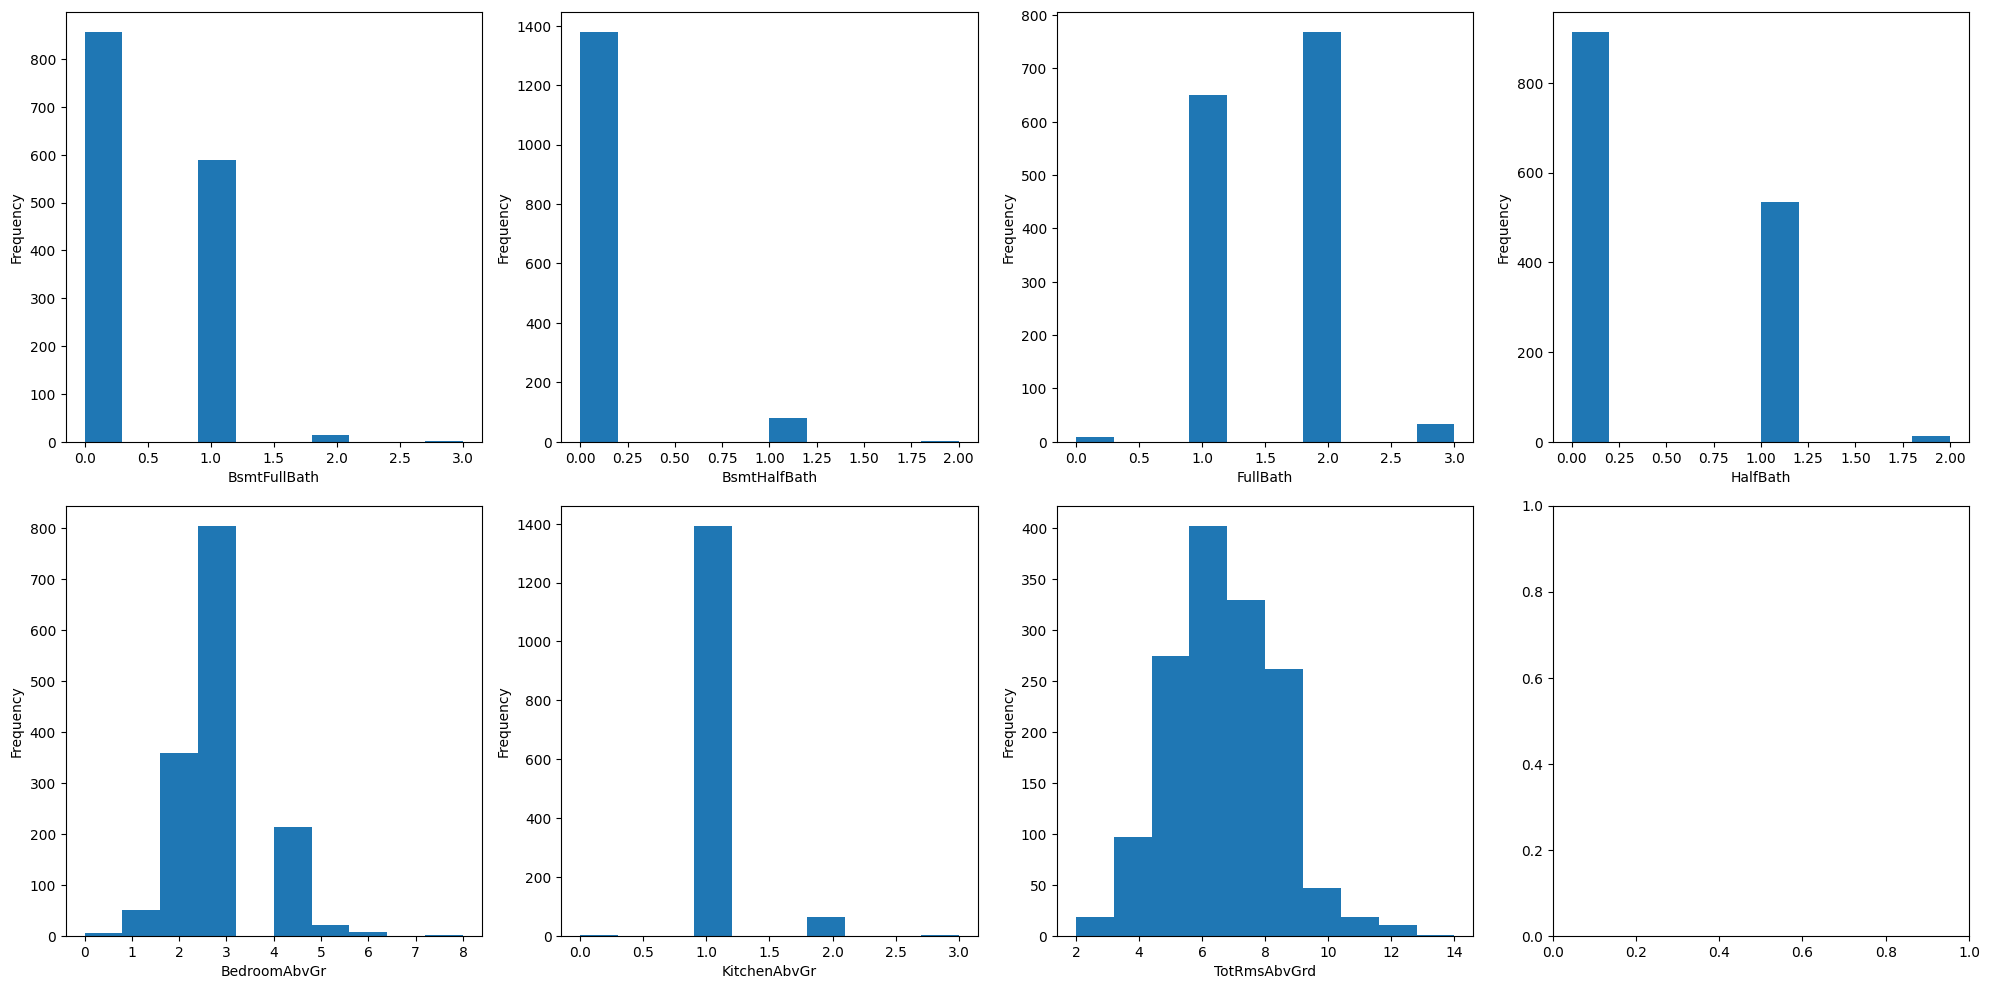

In [ ]:
hist_plots(train_df, property_rooms)

## Property Sale Details

In [ ]:
# Sales Information
sale_details = ['MoSold', 'YrSold', 'SaleCondition', 'SaleType']
column_dict['sale_details'] = sale_details
train_df[sale_details].head()

MoSold  YrSold SaleCondition SaleType
0       2    2008        Normal       WD
1       5    2007        Normal       WD
2       9    2008        Normal       WD
3       2    2006       Abnorml       WD
4      12    2008        Normal       WD

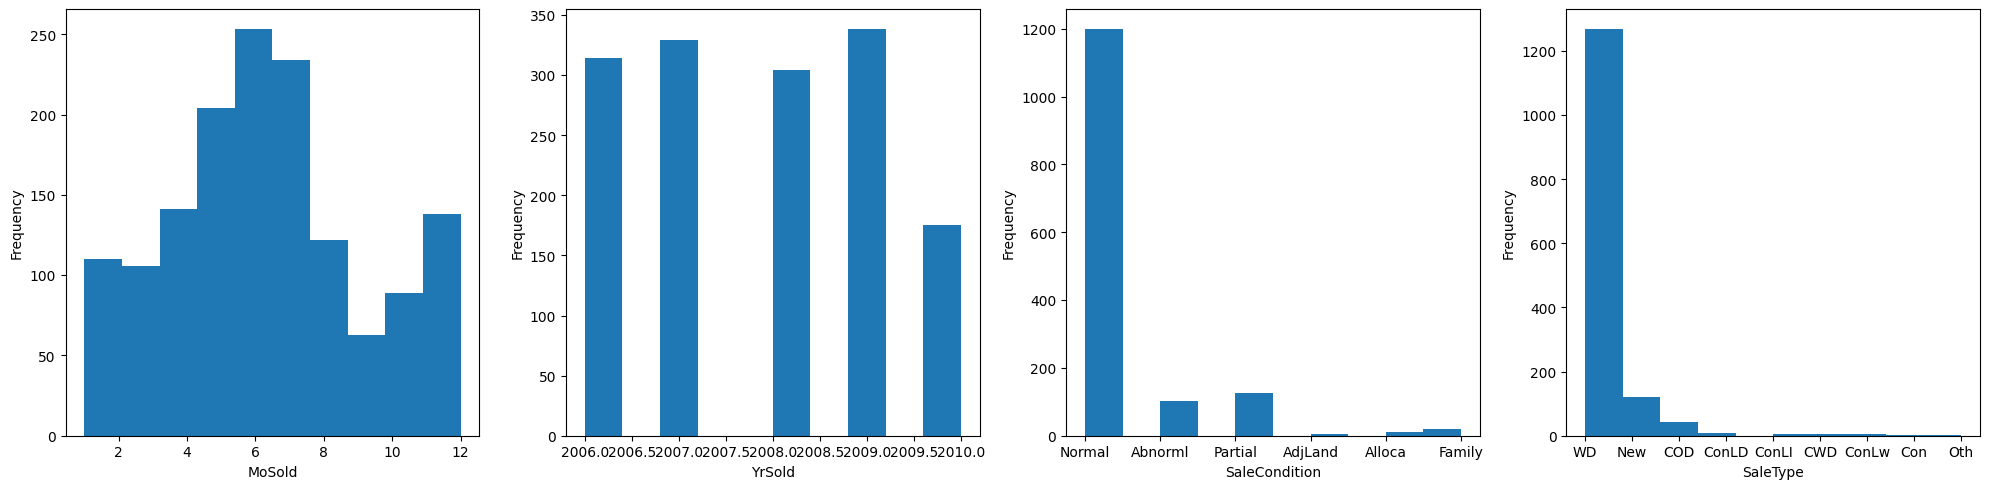

In [ ]:
hist_plots(train_df, sale_details)

## Property Type

In [ ]:
property_type = ['MSSubClass', 'MSZoning', 'BldgType', 'HouseStyle']
column_dict['property_type'] = property_type
train_df[property_type].head()

MSSubClass MSZoning BldgType HouseStyle
0          60       RL     1Fam     2Story
1          20       RL     1Fam     1Story
2          60       RL     1Fam     2Story
3          70       RL     1Fam     2Story
4          60       RL     1Fam     2Story

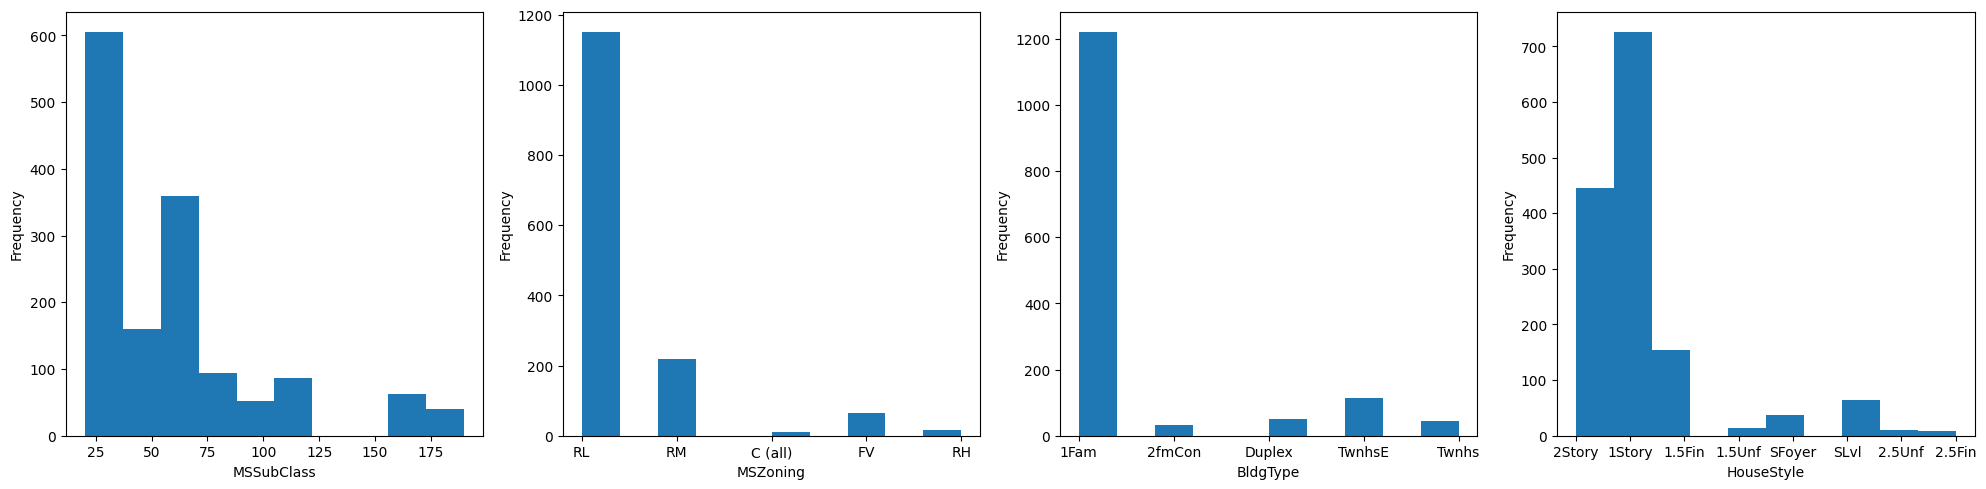

In [ ]:
hist_plots(train_df, property_type)

## Property Location

In [ ]:
property_location = ['Neighborhood', 'Condition1', 'Condition2']
column_dict['property_location'] = property_location
train_df[property_location].head()

Neighborhood Condition1 Condition2
0      CollgCr       Norm       Norm
1      Veenker      Feedr       Norm
2      CollgCr       Norm       Norm
3      Crawfor       Norm       Norm
4      NoRidge       Norm       Norm

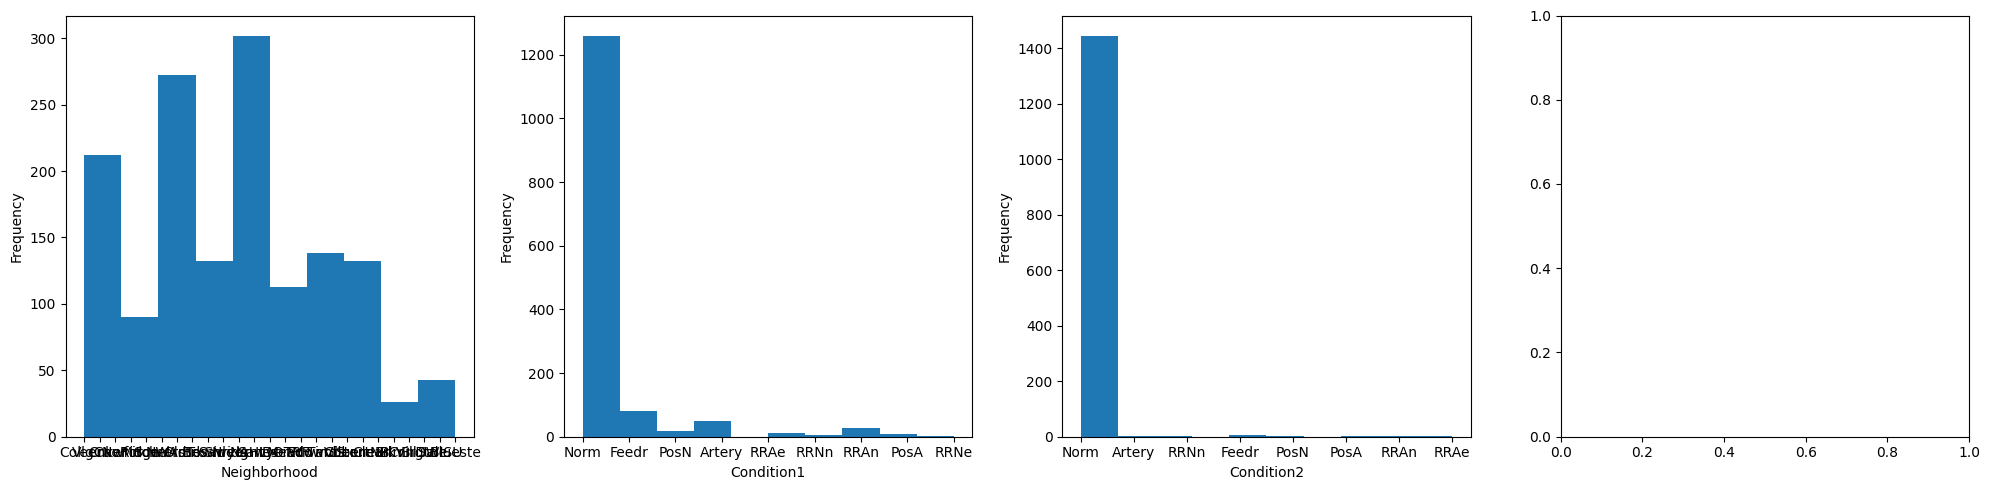

In [ ]:
hist_plots(train_df, property_location)

## Property Features

In [ ]:
property_features = ['Heating', 'CentralAir', 'Electrical', 'Fireplaces']
column_dict['property_features'] = property_features
train_df[property_features].head()

Heating CentralAir Electrical  Fireplaces
0    GasA          Y      SBrkr           0
1    GasA          Y      SBrkr           1
2    GasA          Y      SBrkr           1
3    GasA          Y      SBrkr           1
4    GasA          Y      SBrkr           1

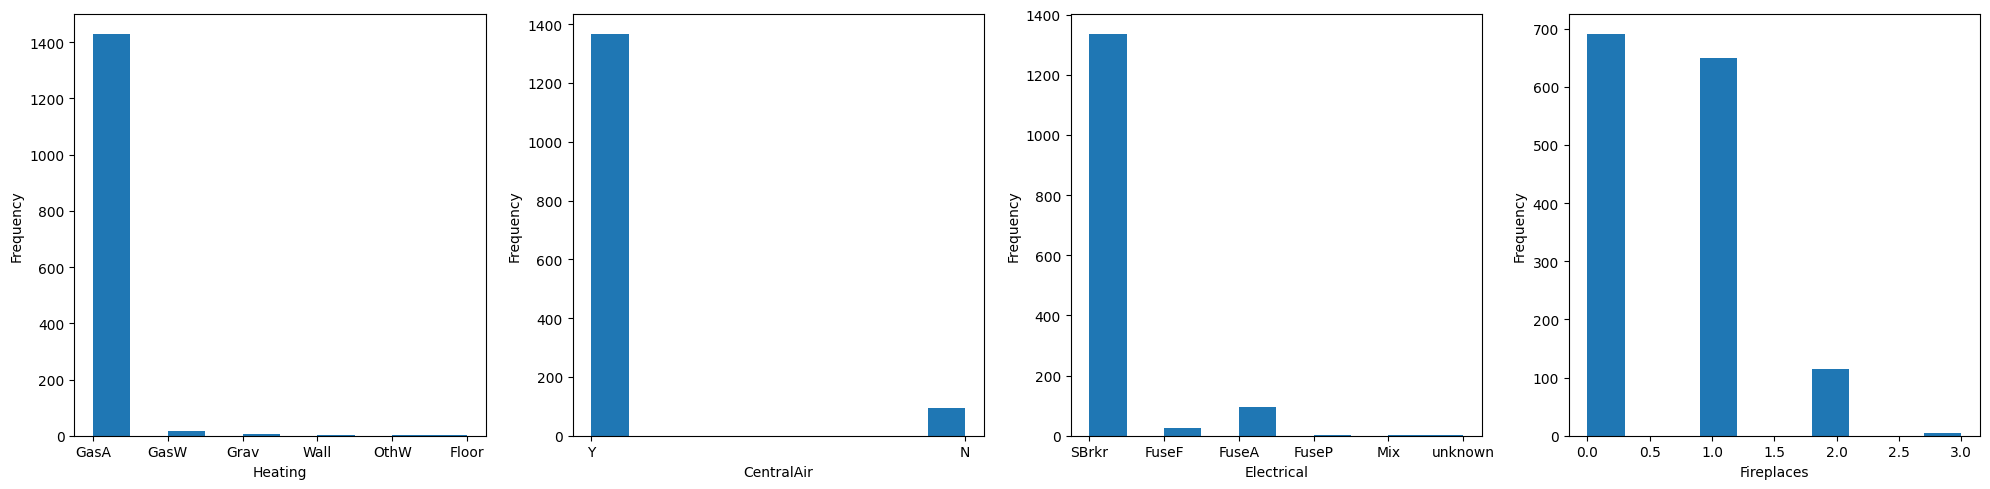

In [ ]:
hist_plots(train_df, property_features)

Property features will be transformed to bool.astype(int)
- Heating: heatGasA = True -> hasHeatGasA
- Electrial: SBrkr = True -> hasElecSBrkr
- Fireplace: >0 = True -> hasFireplace
- CentralAir: Y = True -> hasAirCon

## Build Features

In [ ]:
build_features = ['RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd','BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'Foundation']
column_dict['build_features'] = build_features
train_df[build_features].head()

RoofStyle RoofMatl Exterior1st Exterior2nd BsmtFinType1 BsmtFinType2  \
0     Gable  CompShg     VinylSd     VinylSd          GLQ          Unf   
1     Gable  CompShg     MetalSd     MetalSd          ALQ          Unf   
2     Gable  CompShg     VinylSd     VinylSd          GLQ          Unf   
3     Gable  CompShg     Wd Sdng     Wd Shng          ALQ          Unf   
4     Gable  CompShg     VinylSd     VinylSd          GLQ          Unf   

  BsmtExposure Foundation  
0           No      PConc  
1           Gd     CBlock  
2           Mn      PConc  
3           No     BrkTil  
4           Av      PConc

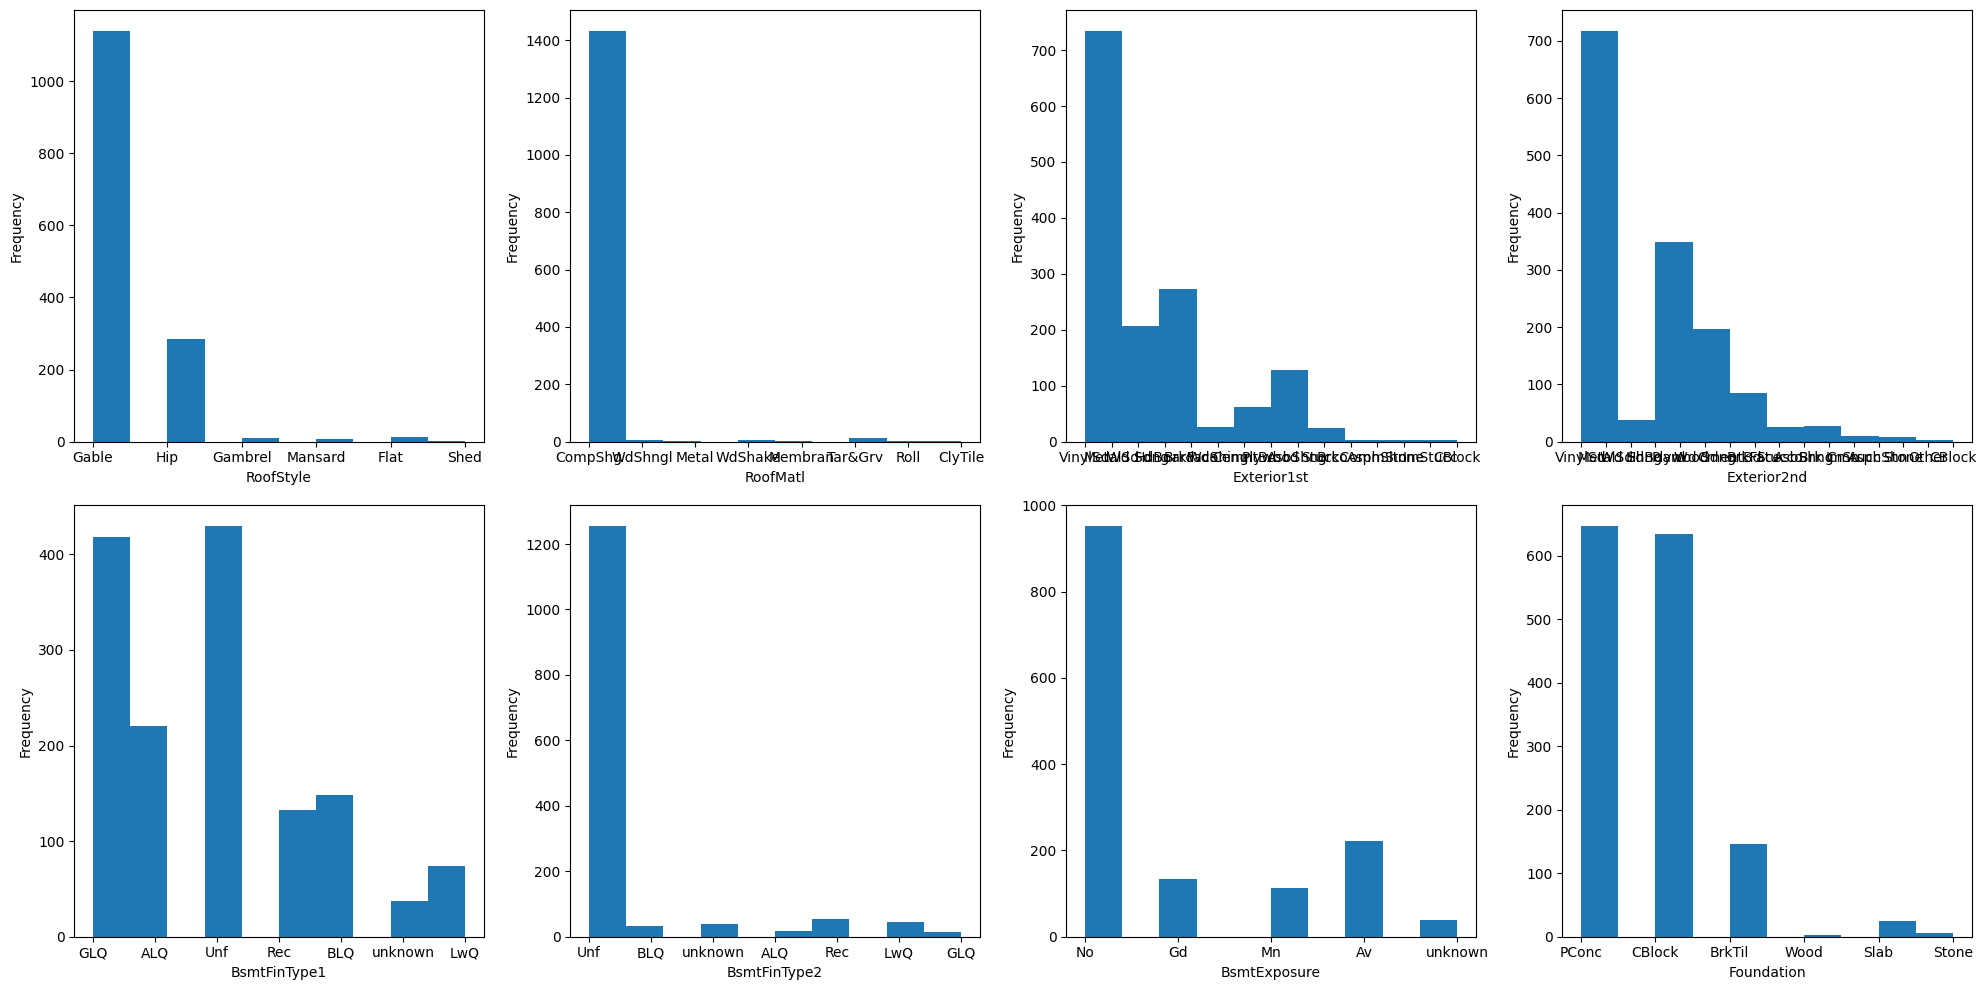

In [ ]:
hist_plots(train_df, build_features)

Most of the build features will be transformer using one hot encoding.

Some features will be grouped before one-hot encoding for fewer value counts, for example:

```BsmtFinType2 -> BsmtFinType2Uni, BsmtFinType2Other```

## Plot Features

In [ ]:
plot_features = ['LotShape', 'LandContour', 'LotConfig', 'LandSlope']
column_dict['plot_features'] = plot_features
train_df[plot_features].head()

LotShape LandContour LotConfig LandSlope
0      Reg         Lvl    Inside       Gtl
1      Reg         Lvl       FR2       Gtl
2      IR1         Lvl    Inside       Gtl
3      IR1         Lvl    Corner       Gtl
4      IR1         Lvl       FR2       Gtl

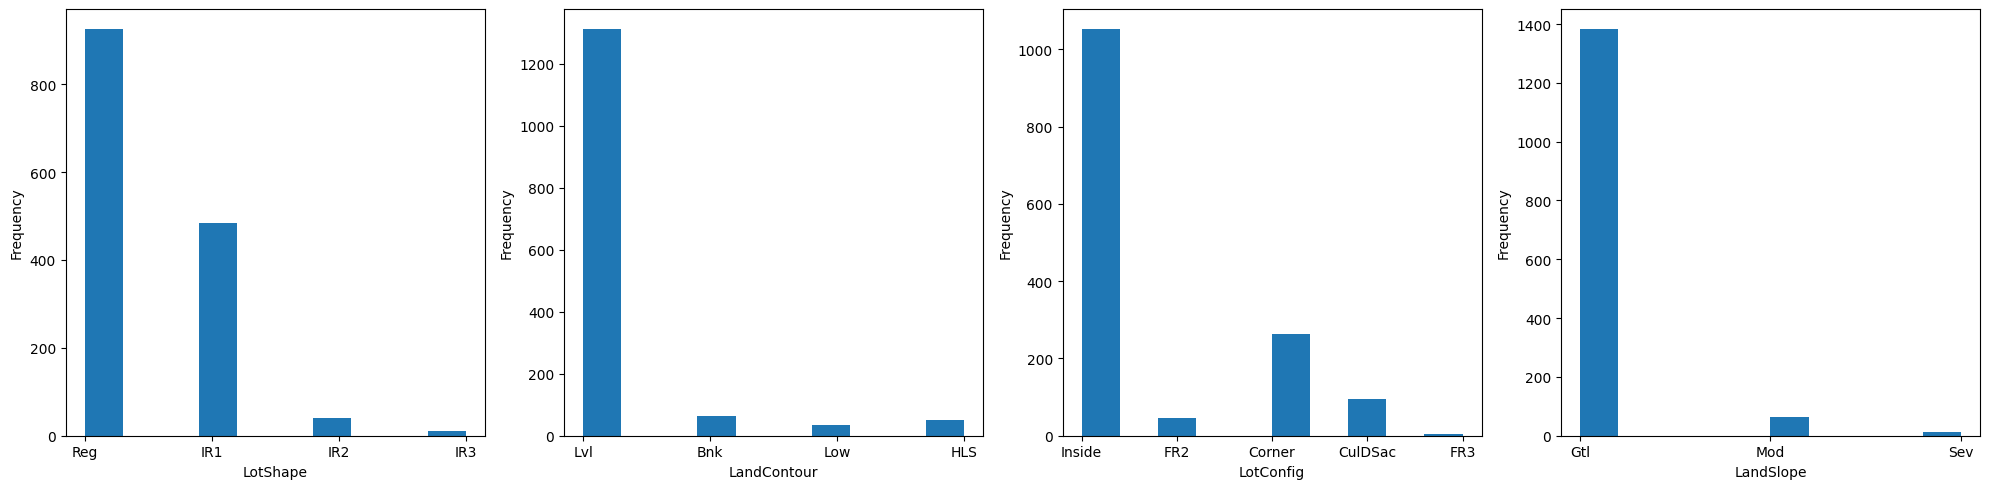

In [ ]:
hist_plots(train_df, plot_features)

## Garage Features

In [ ]:
garage_features = ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars']
column_dict['garage_features'] = garage_features
train_df[garage_features].head()

GarageType  GarageYrBlt GarageFinish  GarageCars
0     Attchd       2003.0          RFn           2
1     Attchd       1976.0          RFn           2
2     Attchd       2001.0          RFn           2
3     Detchd       1998.0          Unf           3
4     Attchd       2000.0          RFn           3

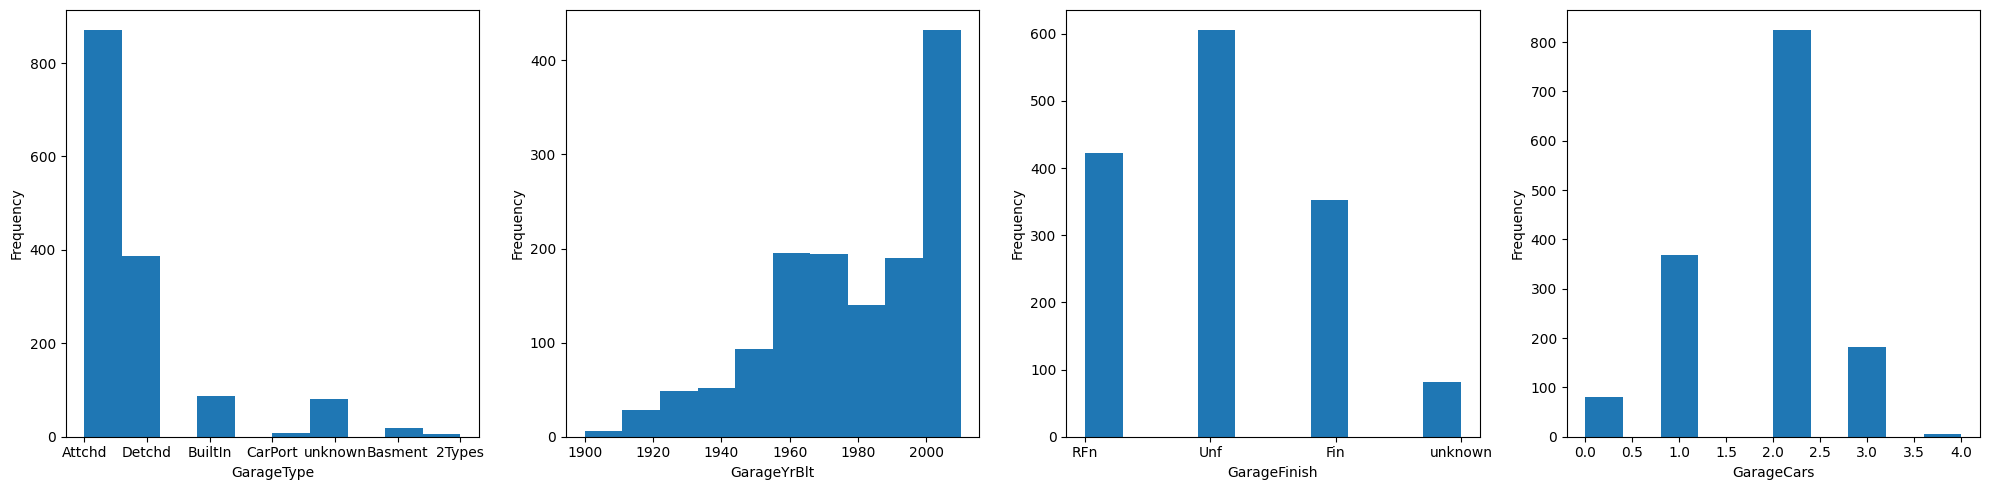

In [ ]:
hist_plots(train_df, garage_features)

## Date Features

In [ ]:
date_features = ['YearBuilt', 'YearRemodAdd', 'YrSold', 'MoSold']
column_dict['date_features'] = date_features
train_df[date_features].head()

YearBuilt  YearRemodAdd  YrSold  MoSold
0       2003          2003    2008       2
1       1976          1976    2007       5
2       2001          2002    2008       9
3       1915          1970    2006       2
4       2000          2000    2008      12

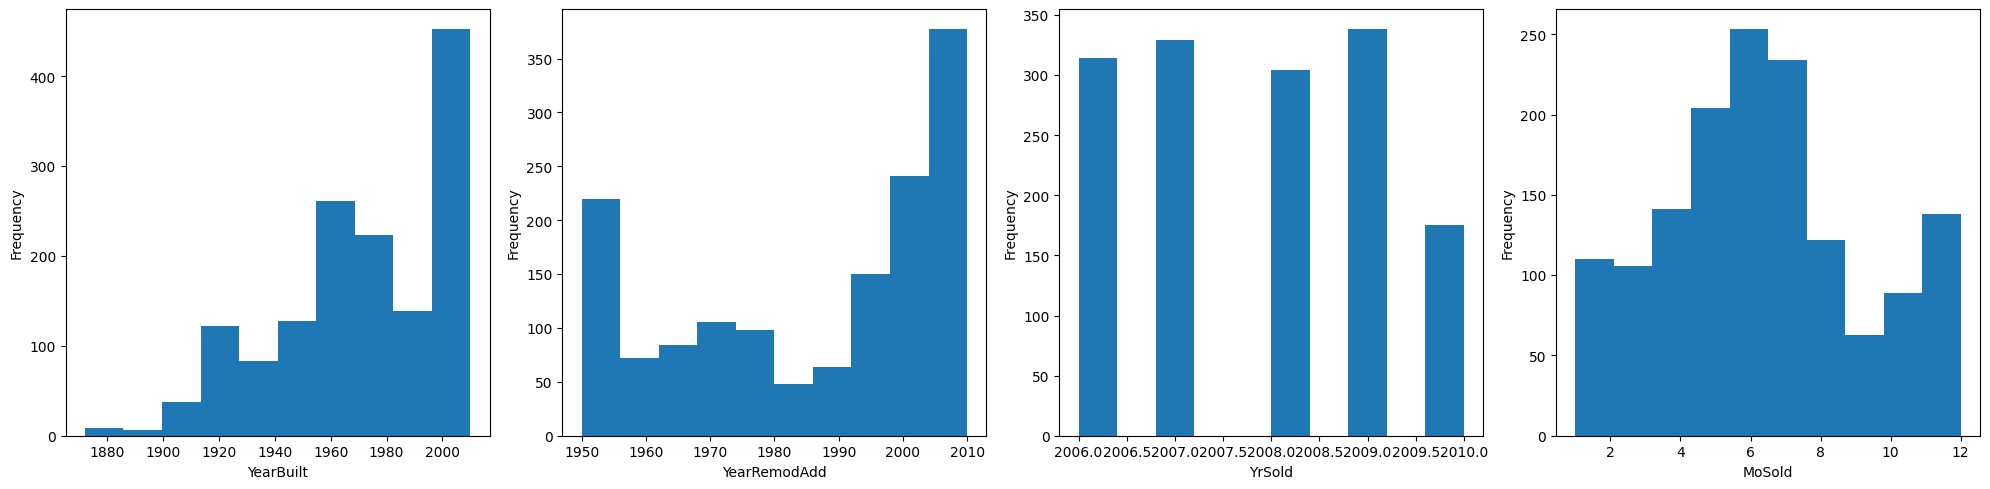

In [ ]:
hist_plots(train_df, date_features)

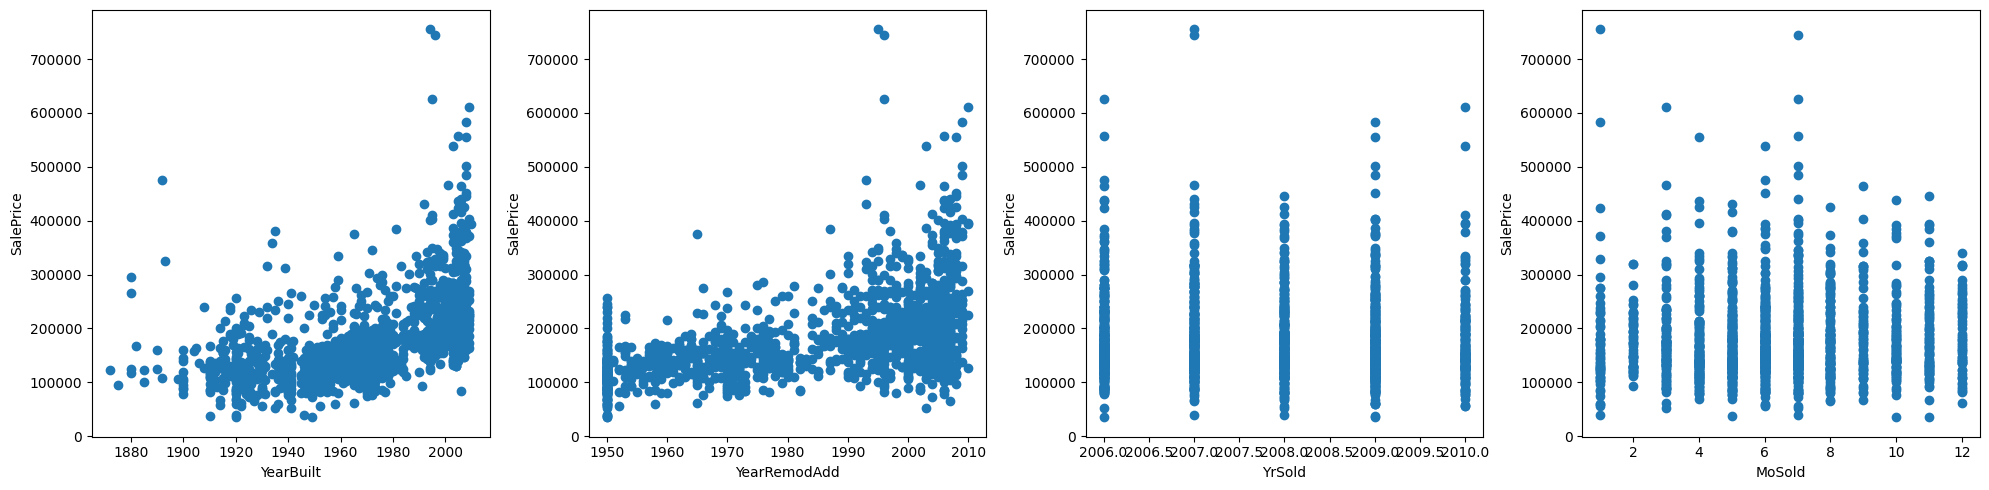

In [ ]:
scatter_plots(train_df, date_features)

# Save Dictionary

In [ ]:
# place all values in dictionary into a single list
column_list = []
for key, value in column_dict.items():
    column_list.extend(value)

# compare column_list against columns in train_df
for col in train_df.columns:
    if col not in column_list:
        print(col)

Street
Utilities
Condition2
OverallCond
Functional
PavedDrive
PoolArea
MiscVal
SalePrice


In [ ]:
# Save dictionary as json
import json
with open(data_dir / "column_dict.json", "w") as f:
    json.dump(column_dict, f)

# save copy of json to google drive
!cp data/column_dict.json "drive/MyDrive/Machine Learning Data/house-prices-advanced-regression-techniques/"

# To Add

# Dimension Reduction

In [ ]:
# drop rows where saleprice is greater than 400000
train_df = train_df[train_df['SalePrice'] <= 400000]
train_df.shape